# Decision Support System 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import seaborn as sns
# import sklearn.metrics import train_test_split

c:\Anaconda\envs\Python3_10_10\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Mô tả dữ liệu

In [3]:
%matplotlib inline

In [4]:
url = "D:\HK20222\Decision_Support_System\Project\Project1"
data = pd.read_csv(url + "\Sample - Superstore.csv", encoding='windows-1252')

In [5]:
data.describe(include = 'all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,1334,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32063.693350,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [6]:
data.shape

(9994, 21)

In [7]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
data = data.drop_duplicates()
data.shape

(9994, 21)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
data.drop(columns = 'Row ID', axis = 1, inplace = True)

In [11]:
data

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


## Trực quan hóa dữ liệu

array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

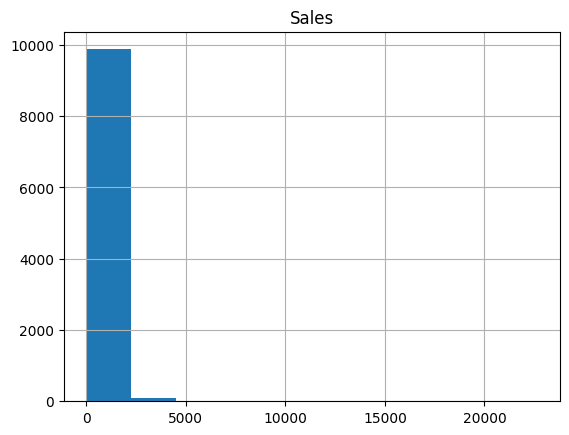

In [12]:
# plt.bar(data[])
data.hist(["Sales"])

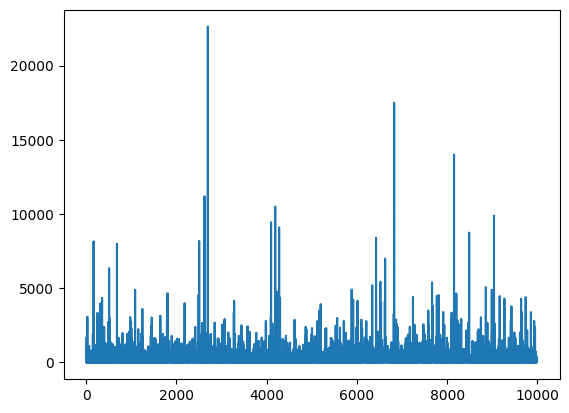

In [13]:
plt.plot(data['Sales'])

In [14]:
data.nunique()

Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [15]:
data["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [16]:
data["Country"].unique()

array(['United States'], dtype=object)

In [17]:
data["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [18]:
data["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [19]:
data.groupby(["Ship Mode"]).size()

Ship Mode
First Class       1538
Same Day           543
Second Class      1945
Standard Class    5968
dtype: int64

In [6]:
def plotbarcharts(dataset,columns, colors = 'orange'):
    fig, subplot = plt.subplots(nrows = 1, ncols = len(columns), figsize = (20, 8))
    fig.suptitle('Bar Chart for' + str(columns))
    for column_name, plot_number in zip(columns, range(len(columns))):
        dataset[column_name].value_counts(ascending = True).plot(kind = 'bar', ax = subplot[plot_number], color = colors, edgecolor = 'grey')

# data.value_counts(ascending=True)

In [21]:
data["Order Date"]

0        11/8/2016
1        11/8/2016
2        6/12/2016
3       10/11/2015
4       10/11/2015
           ...    
9989     1/21/2014
9990     2/26/2017
9991     2/26/2017
9992     2/26/2017
9993      5/4/2017
Name: Order Date, Length: 9994, dtype: object

In [7]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format= '%m/%d/%Y')

In [8]:
# Function to get month from a date
def Function_get_month(inpDate):
    return(inpDate.month)

# Function to get Year from a date
def Function_get_year(inpDate):
    return(inpDate.year)

# Creating new columns
data['Month']=data['Order Date'].apply(Function_get_month)
data['Year']=data['Order Date'].apply(Function_get_year)

data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
0,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016
1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016
2,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016
3,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015
4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015


In [24]:
data.shape

(9994, 22)

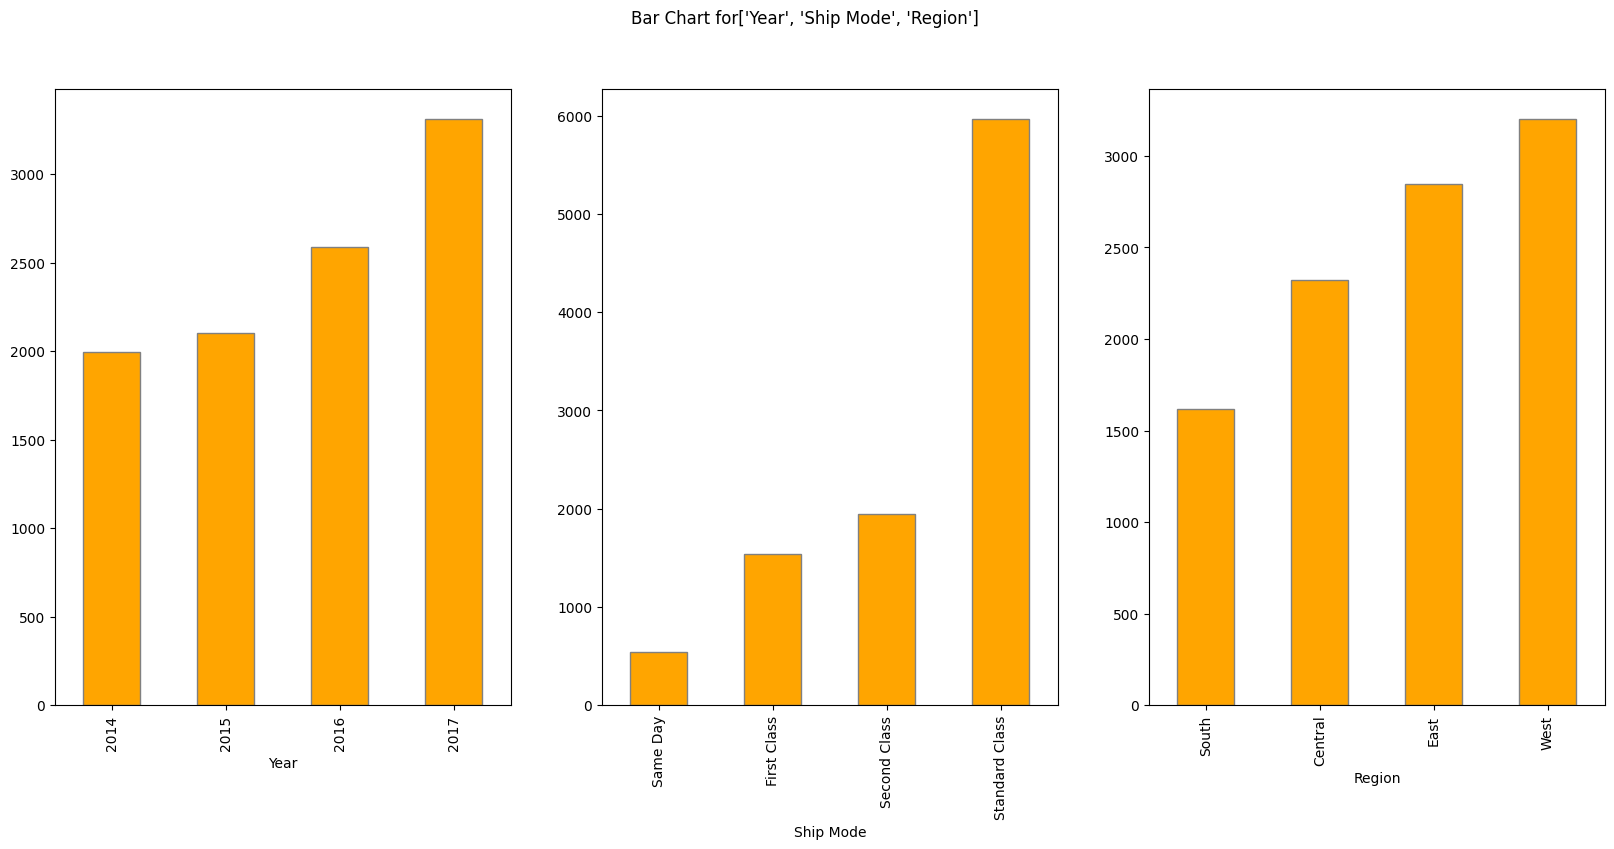

In [25]:
columns_1 = ["Year", "Ship Mode", "Region"]
plotbarcharts(data, columns_1)

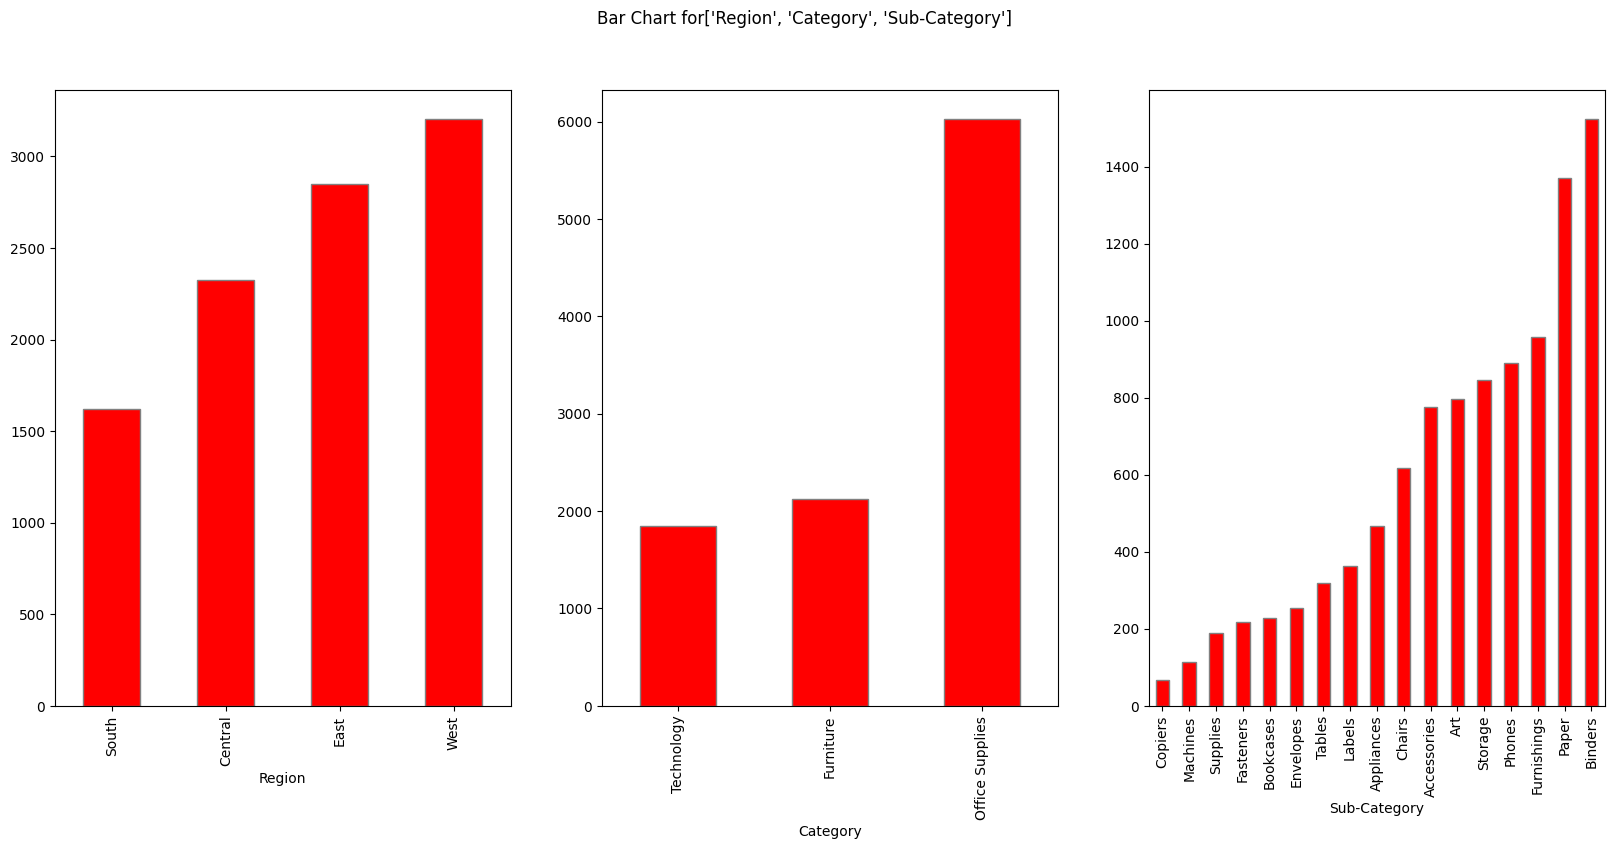

In [26]:
columns_2 = ["Region", "Category", "Sub-Category"]
plotbarcharts(data, columns_2, colors = 'r')

<Axes: xlabel='State'>

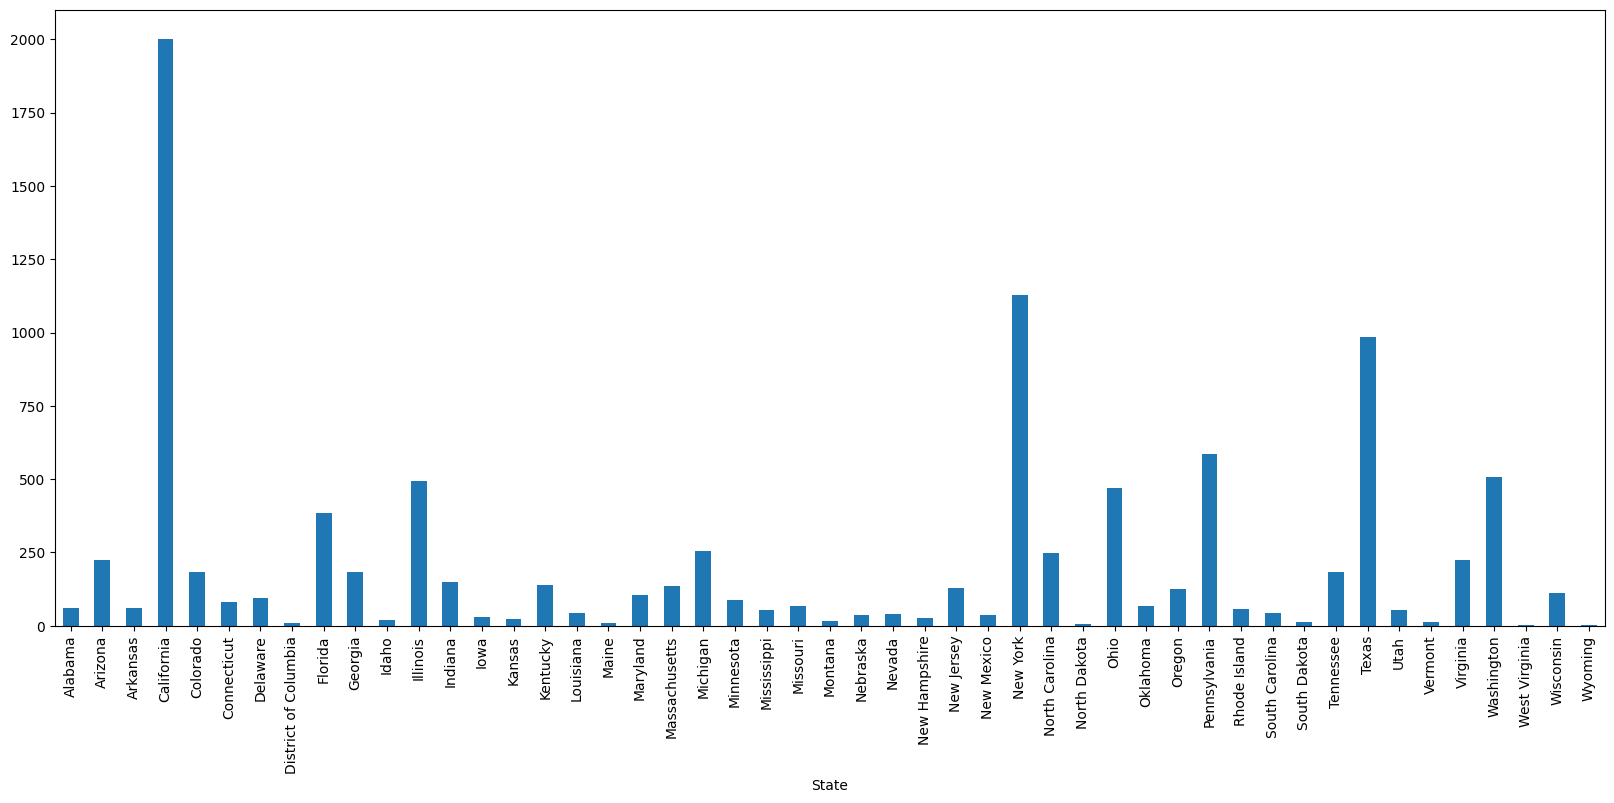

In [27]:
data.groupby(['State']).size().plot(kind='bar',figsize=(20,8))

In [28]:
data.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Month            0
Year             0
dtype: int64

<Axes: xlabel='Month'>

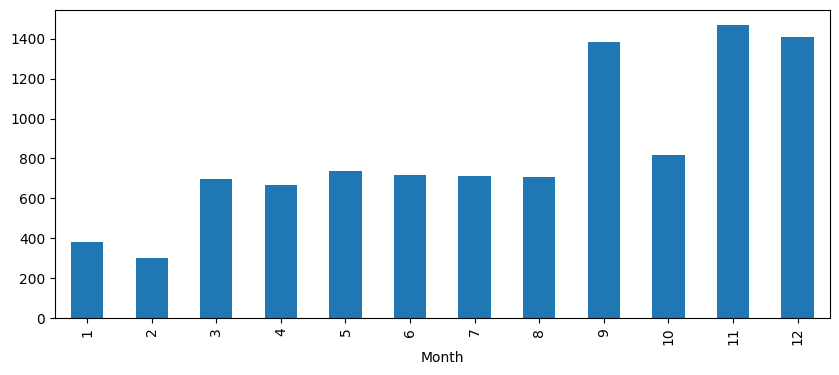

In [29]:
data.groupby(['Month']).size().plot(kind='bar', figsize = (10, 4))

<Axes: xlabel='Year'>

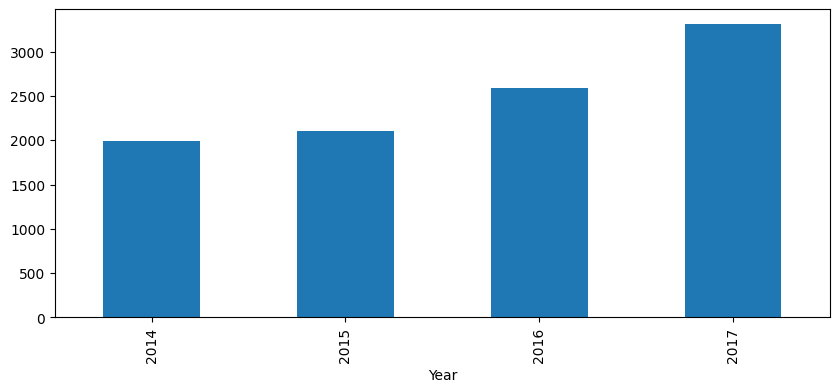

In [30]:
data.groupby(['Year']).size().plot(kind='bar', figsize = (10, 4))

<Axes: xlabel='Order Date'>

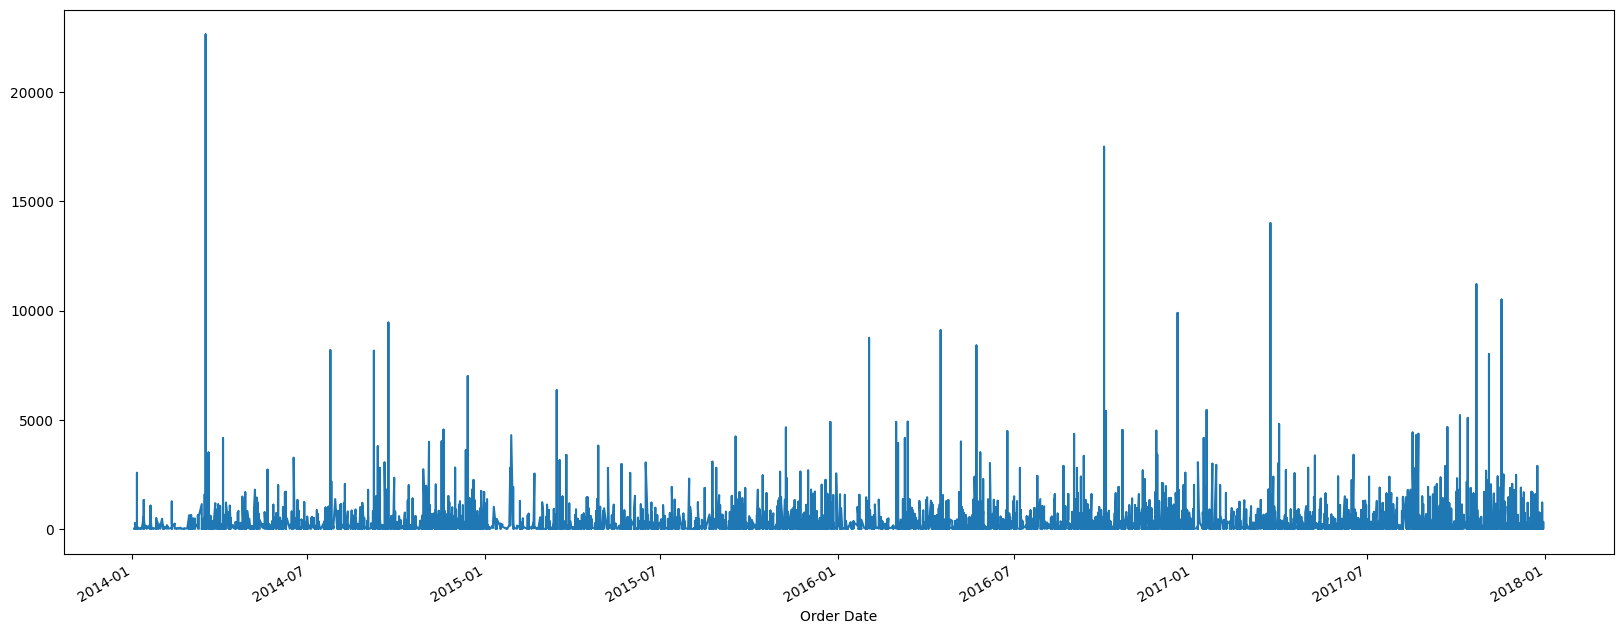

In [31]:
data.set_index('Order Date', inplace = True) # Set the index of rows to Order Date 
data['Sales'].plot(figsize = (20, 8))
# data.set_index()

In [32]:
# Aggregating the sales quantity for each month for all categories
pd.crosstab(columns=data['Month'],
            index=data['Year'],
            values=data['Sales'],
            aggfunc='sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2014,14236.8950,4519.8920,55691.0090,28295.3450,23648.2870,34595.1276,33946.393,27909.4685,81777.3508,31453.3930,78628.7167,69545.6205
2015,18174.0756,11951.4110,38726.2520,34195.2085,30131.6865,24797.2920,28765.325,36898.3322,64595.9180,31404.9235,75972.5635,74919.5212
2016,18542.4910,22978.8150,51715.8750,38750.0390,56987.7280,40344.5340,39261.963,31115.3743,73410.0249,59687.7450,79411.9658,96999.0430
2017,43971.3740,20301.1334,58872.3528,36521.5361,44261.1102,52981.7257,45264.416,63120.8880,87866.6520,77776.9232,118447.8250,83829.3188


## Time Series Analysis

### Cơ sở lý thuyết

#### Mô hình chuỗi thời gian
Các phương pháp áp dụng mô hình liên tiến lũy thừa

* Mô hình Winters
* Mô hình Holt trên chuỗi thời gian đã khử mùa
* Mô hình đơn giản (Brown) trên chuỗi thời gian đã khử khuynh và mùa.

Một số toán tử:
* Toán tử truy ngược B
\begin{equation*}
B^h Y_t = Y_{t-h}
\end{equation*}
* Khử thành phần không ổn định bằng toán tử sai phân
\begin{align*}
\bigtriangledown Y_t = Y_t - Y_{t-1} \\
\bigtriangledown = 1 - B
\end{align*}

Mô hình tự hồi quy (AR(p))

Mô hình trung bình trượt (MA(q))

Mô hình tự hồi quy trung bình trượt (ARMA(p, q))

Mô hình tự hồi quy trung bình trượt tích hợp (ARIMA(p,q,d))

B1: Kiểm tra tính dừng của chuỗi thời gian (theo tiêu chuẩn Dickey Fuller)

B2: Kiểm tra tính mùa và lựa chọn hệ số p dựa theo đồ thị PACF và q theo ACF, d lựa chọn dựa theo tính dừng của chuỗi thời gian


### Chạy mô hình

In [9]:
SalesQuantity =pd.crosstab(columns=data['Year'],
            index=data['Month'],
            values=data['Sales'],
            aggfunc='sum').melt()['value']


In [14]:
Months = ['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4
F = pd.DataFrame(SalesQuantity.values, columns = ['Sales Quantity'], index = Months)
F['Months'] = Months
F

,Sales Quantity,Months
Jan,14236.8950,Jan
Feb,4519.8920,Feb
Mar,55691.0090,Mar
Apr,28295.3450,Apr
May,23648.2870,May
Jun,34595.1276,Jun
Jul,33946.3930,Jul
Aug,27909.4685,Aug
Sep,81777.3508,Sep
Oct,31453.3930,Oct


In [13]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):

    result = adfuller(series.values)
    print(result)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [36]:
check_stationarity(SalesQuantity[0:42])

(-5.308299479695618, 5.263010287235519e-06, 0, 41, {'1%': -3.60098336718852, '5%': -2.9351348158036012, '10%': -2.6059629803688282}, 706.2448207564213)
ADF Statistic: -5.308299
p-value: 0.000005
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606
Stationary


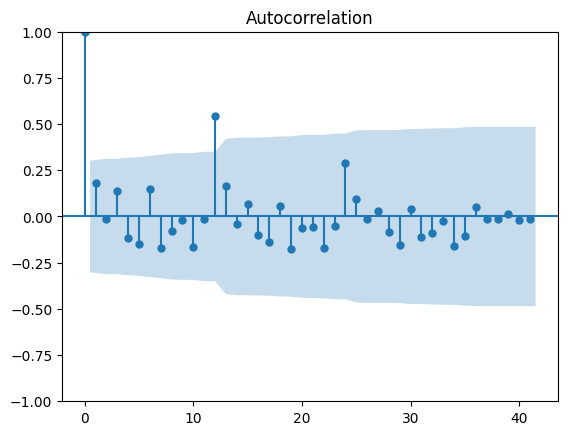

In [37]:
plot_acf(SalesQuantity[0:42], lags = 41)
plt.show()

c:\Anaconda\envs\Python3_10_10\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


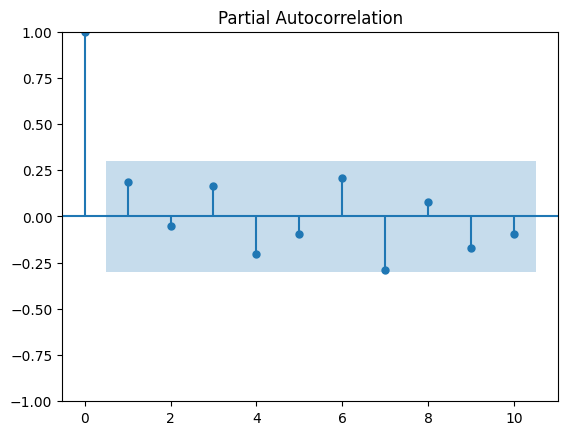

In [38]:
plot_pacf(SalesQuantity[0:42], lags = 10)
plt.show()

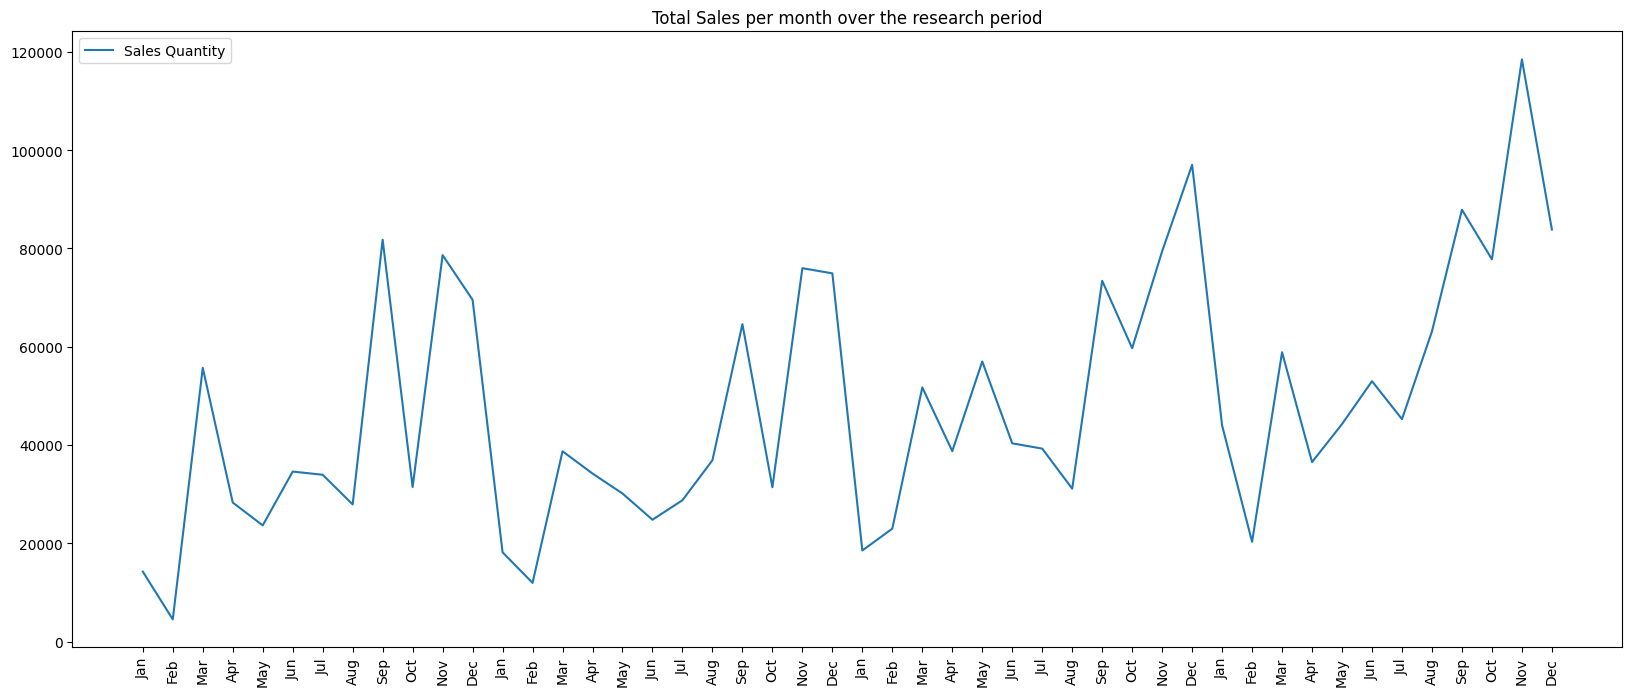

In [39]:
Months = ['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

SalesQuantity.plot(kind = 'line', figsize = (20, 8), title = 'Total Sales per month over the research period')

plotLabels = plt.xticks(np.arange(0, 48, 1), Months, rotation = 90)

# rolling = SalesQuantity.rolling(window = 3)
# rolling_mean = rolling.mean()
# rolling_mean.plot(color = 'r')
plt.legend(['Sales Quantity'])
plt.savefig("figure_1.png")

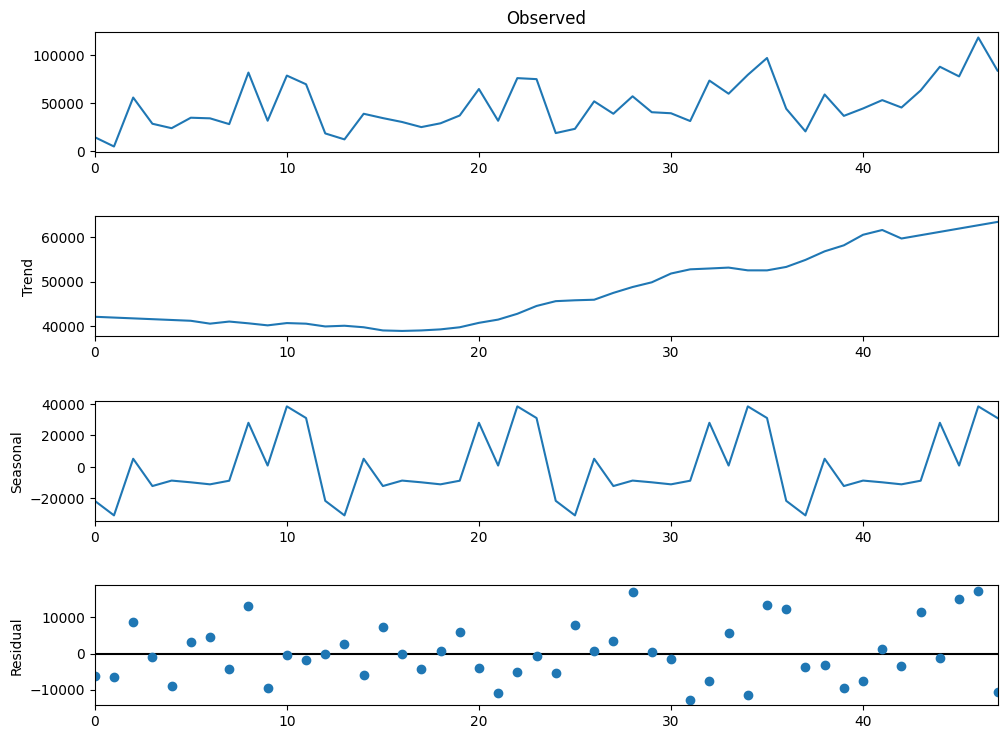

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = SalesQuantity.values
result_add = seasonal_decompose(series, model='additive', period=12 , extrapolate_trend='freq')
# result_mul = seasonal_decompose(series, model='multiplicative', period=12 , extrapolate_trend='freq')
result_add.plot()
CurrentFig=plt.gcf()
CurrentFig.set_size_inches(11,8)
plt.savefig("figure_2.png")
# # result_mul.plot()
# CurrentFig=plt.gcf()
# CurrentFig.set_size_inches(11,8)
# plt.show()
# plt.savefig("figure_3.png")

#### Sử dụng mô hình SARIMAX (SARIMA With Exogenous variable)

Mô hình SARIMA ($p, q, d$)

\begin{align*}
A_t &= \bigtriangledown^d Y_t \\
    &= \gamma + \varepsilon_t + \phi_1 A_{t-1} + \phi_2 A_{t-2} + \ldots + \phi_p A_{t-p} \\
    & - v_1 z_{t-1} - v_2 z_{t-2} - \ldots - v_q z_{t-q}
\end{align*}

\begin{align*}
f_{t+1} &= \gamma + \phi_1 A_{t} + \phi_2 A_{t-1} + \ldots + \phi_p A_{t-p+1} \\
   & - v_1 z_{t} - v_2 z_{t-1} - \ldots - v_q z_{t-q+1}
\end{align*}



Next Six Month Forecast: 49     49948.222838
50    128587.020033
51     86981.551172
52     90846.365865
53    102398.123994
54     96548.225620
Name: Forecast, dtype: float64
MAPE = 18.65204910607977


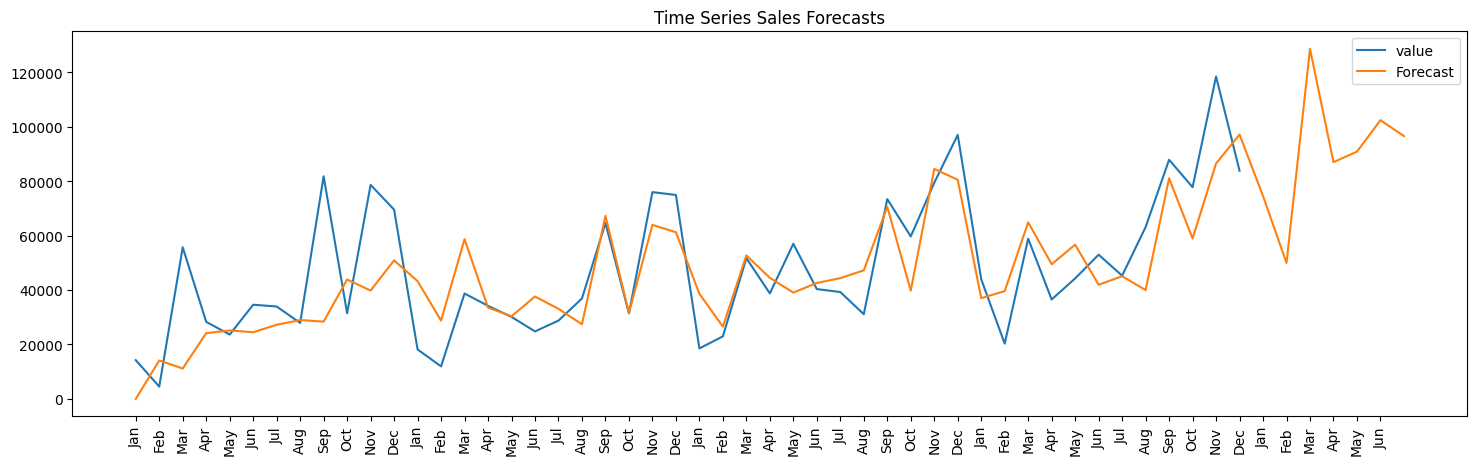

In [41]:
# Importing the algorithm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

# Train the model on the full dataset 
SarimaxModel = model = SARIMAX(SalesQuantity[0:42],  
                        order = (1, 0, 1),  
                        seasonal_order = (7, 0, 12, 12),
                        initialization='approximate_diffuse') 
SalesModel = SarimaxModel.fit()

# print(SalesModel.summary())

print("\n")
# Forecast for the next 6 months
forecast = SalesModel.predict(start = 0,
                          end = len(SalesQuantity) + 6,
                          typ = 'levels').rename('Forecast')
print("Next Six Month Forecast:",forecast[-6:])

# Plot the forecast values
SalesQuantity.plot(figsize = (18, 5), legend = True, title='Time Series Sales Forecasts')
forecast.plot(legend = True, figsize=(18,5))

# Measuring the accuracy of the model # MSE
MAPE=np.mean(abs(SalesQuantity[42:]-forecast[42:])/SalesQuantity[42:])*100

print("MAPE = " + str(MAPE))
# print('#### Accuracy of model:', round(100-MAPE,2), '####')

# Printing month names in X-Axis
MonthNames=Months+Months[0:6]
plotLabels=plt.xticks(np.arange(0,54,1),MonthNames, rotation=90)
plt.savefig("figure_4.png")

In [42]:
print(MAPE)

18.65204910607977


In [43]:
forecast = forecast[-6:]
forecast = forecast.astype('int') #saving the sales values as type integer
forecast_df = forecast.to_frame() # forecast is in Series form, converting it to DataFrame
forecast_df.reset_index(level=0, inplace=True) # converting the index to column
forecast_df.columns = ['Prediction Date', 'Predicted Sales'] # giving appropriate names to the output columns

# saving the output as a csv file with name 'prediction.csv'
prediction = pd.DataFrame(forecast_df).to_csv(url + '\prediction_Sales.csv',index=False) 

<Axes: xlabel='Category'>

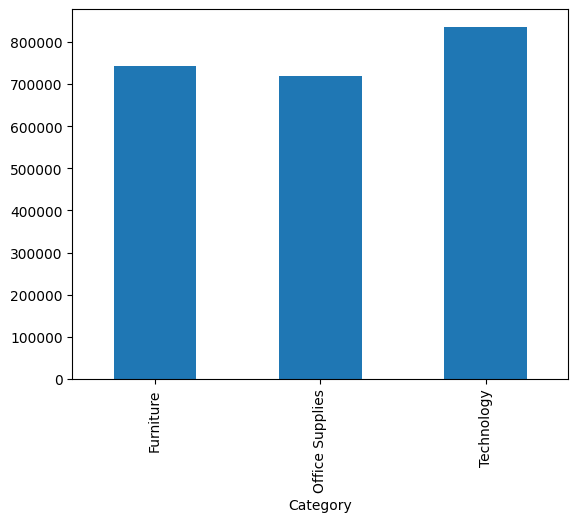

In [44]:
data.groupby(['Category']).sum()['Sales'].plot(kind='bar')

<Axes: xlabel='Sub-Category'>

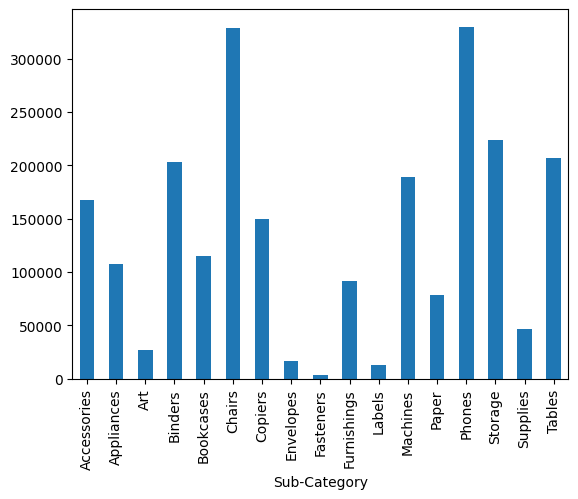

In [45]:
data.groupby(['Sub-Category']).sum()['Sales'].plot(kind = 'bar')

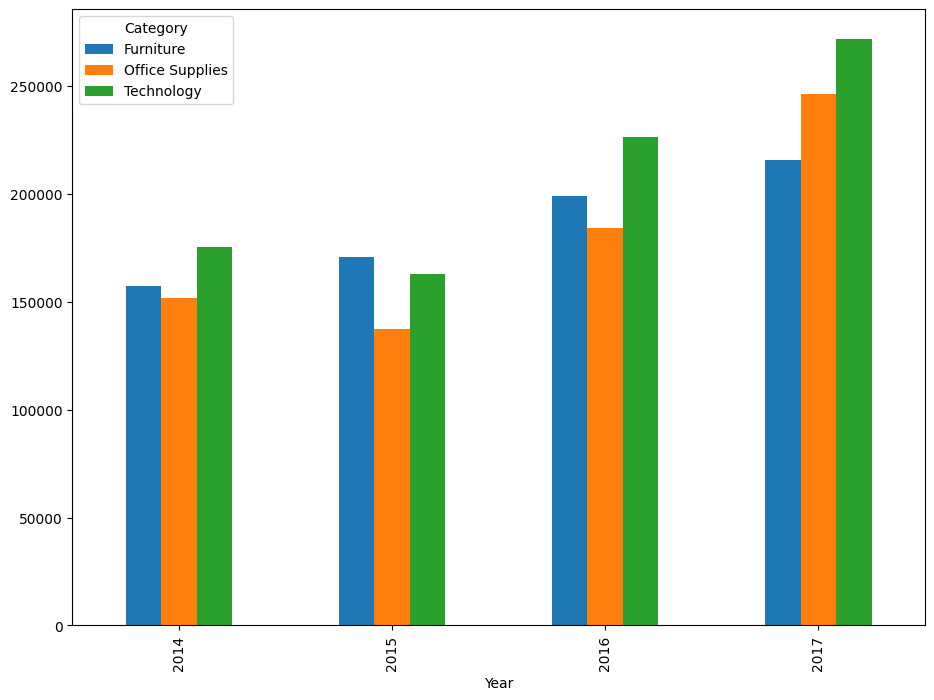

In [46]:
g = pd.crosstab(columns = data['Category'],
                index = data['Year'],
                values = data['Sales'],
                aggfunc='sum')

g.plot(kind = 'bar', figsize = (11, 8), style = 'whitegrid')
plt.savefig("figure_5")

##### Dự báo doanh số của mặt hàng công nghệ

In [17]:
TechnologySales_Data = data[data['Category'] == 'Technology']

In [48]:
pd.crosstab(columns=TechnologySales_Data['Month'],
            index = TechnologySales_Data["Year"],
            values = TechnologySales_Data["Sales"],
            aggfunc= 'sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2014,3143.290,1608.510,32511.174,9195.434,9599.876,8435.965,8004.134,9209.660,30537.572,11938.018,30201.408,20893.192
2015,4625.354,3448.970,10343.922,11160.952,11643.000,6435.366,10370.966,15524.632,19017.128,10704.890,23873.601,35632.028
2016,5620.066,12258.914,21567.852,14890.502,28832.691,16372.152,13269.000,9672.402,22883.406,31533.374,27141.059,22322.762
2017,16733.053,6027.024,33428.622,12383.387,13566.588,17061.100,23209.926,17619.162,26942.603,32855.663,49918.773,21984.910


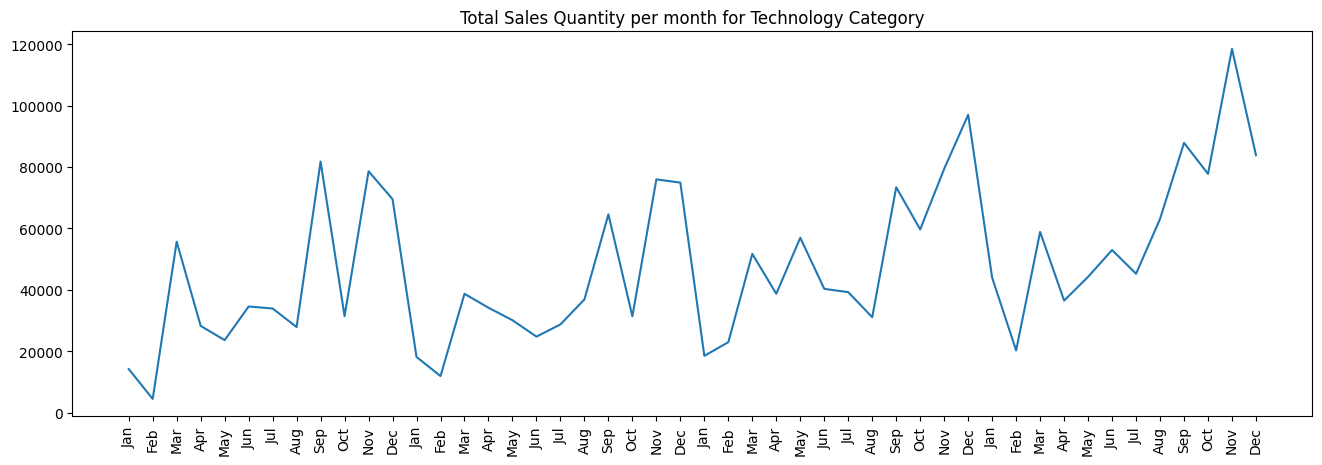

In [18]:
import matplotlib.pyplot as plt
SalesQuantity_Tech=pd.crosstab(columns=TechnologySales_Data['Year'],
                        index=TechnologySales_Data['Month'],
                        values=TechnologySales_Data['Sales'],
                        aggfunc='sum').melt()['value']

MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

# Plotting the sales
SalesQuantity.plot(kind='line', figsize=(16,5), title='Total Sales Quantity per month for Technology Category')
# Setting the x-axis labels
plotLabels=plt.xticks(np.arange(0,48,1),MonthNames, rotation=90)
plt.savefig("Plot_Tech")

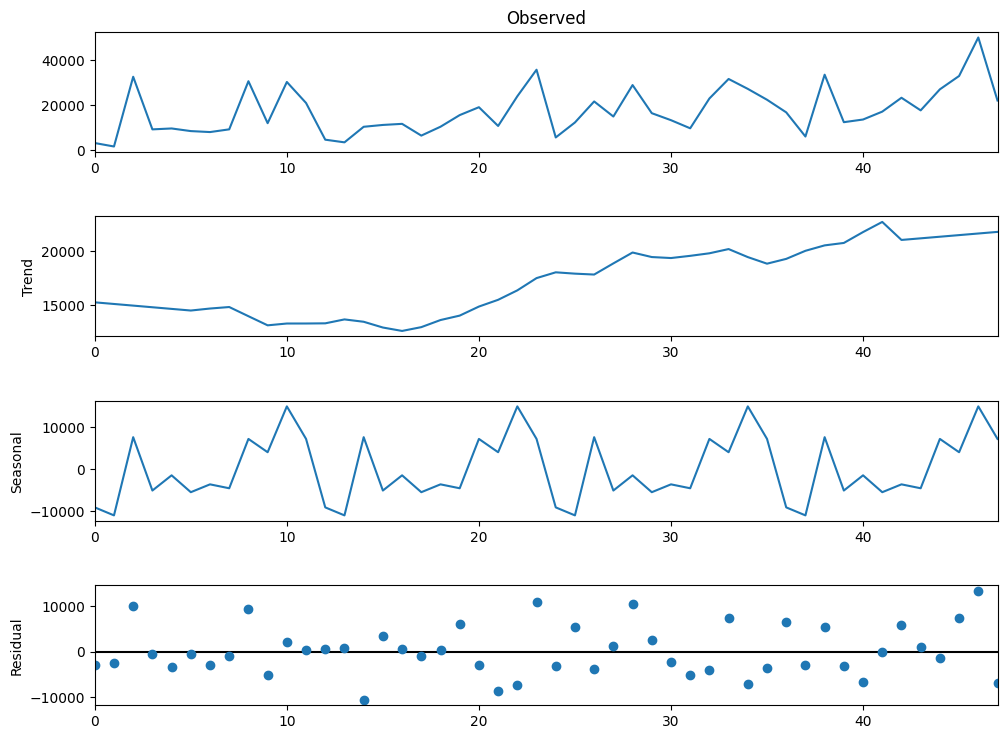

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = SalesQuantity_Tech.values
result_add = seasonal_decompose(series, model='additive', period=12 , extrapolate_trend='freq')
# result_mul = seasonal_decompose(series, model='multiplicative', period=12 , extrapolate_trend='freq')
result_add.plot()
CurrentFig=plt.gcf()
CurrentFig.set_size_inches(11,8)
plt.savefig("Plot_Tech_2.png")

In [50]:
check_stationarity(SalesQuantity_Tech[0:42])

(-6.06825041945304, 1.1676064051448956e-07, 0, 41, {'1%': -3.60098336718852, '5%': -2.9351348158036012, '10%': -2.6059629803688282}, 652.1100070863604)
ADF Statistic: -6.068250
p-value: 0.000000
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606
Stationary


In [51]:
check_stationarity(SalesQuantity_Tech)

(-5.522761103726895, 1.861596730206398e-06, 0, 47, {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}, 786.7114503372798)
ADF Statistic: -5.522761
p-value: 0.000002
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601
Stationary


In [133]:
# check_stationarity(abs(SalesQuantity_Tech.diff()))
check_stationarity(SalesQuantity_Tech.diff()[1:43])

(-4.452112239845145, 0.00023976055145417117, 10, 36, {'1%': -3.626651907578875, '5%': -2.9459512825788754, '10%': -2.6116707716049383}, 768.91350581387)
ADF Statistic: -4.452112
p-value: 0.000240
Critical Values:
	1%: -3.627
	5%: -2.946
	10%: -2.612
Stationary


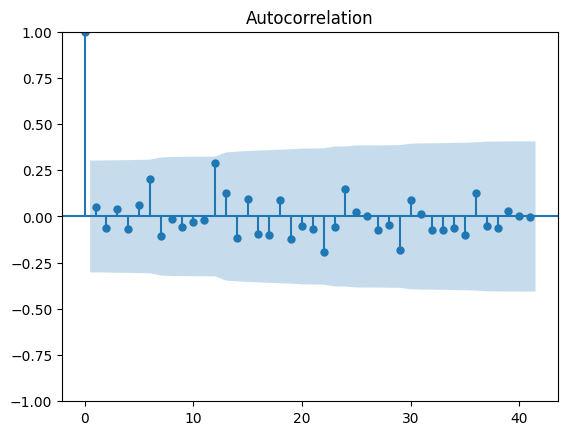

In [52]:
plot_acf(SalesQuantity_Tech[0:42], lags = 41)
plt.show()

[]

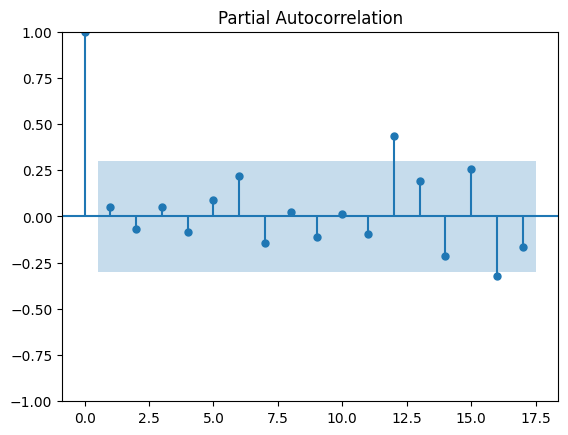

In [121]:
plot_pacf(SalesQuantity_Tech[0:42])
plt.plot()

MAPE = 27.081342857724


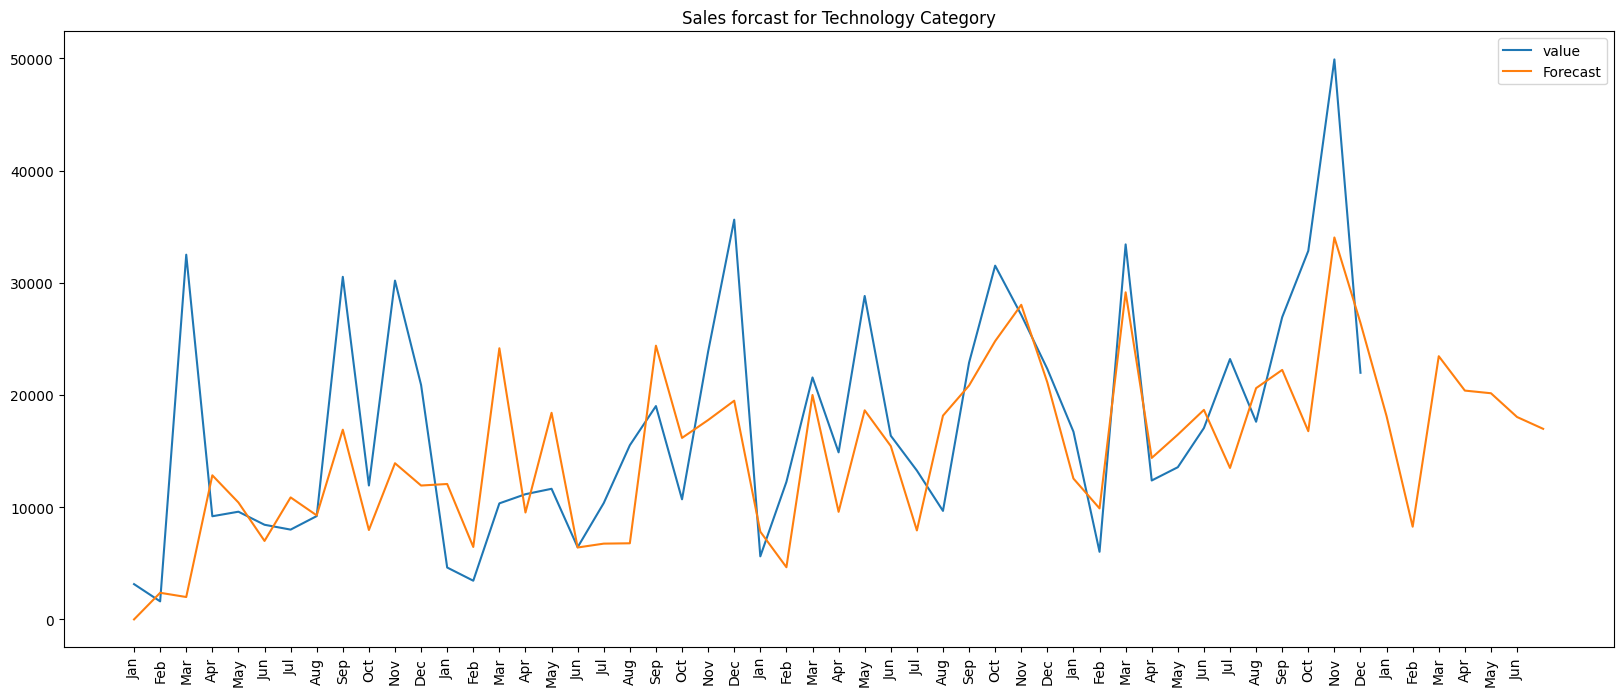

In [211]:
SarimaxModel_Tech = SARIMAX(SalesQuantity_Tech[0:43],
                            order = (9, 0, 6), # p , d, q
                            seasonal_order = (12, 0, 6, 12)) # P, D, Q, s -> monthly: periodically: 12
# (3, 0, 7), (12, 0, 1, 12)
SalesModel_Tech = SarimaxModel_Tech.fit()

forecast2 = SalesModel_Tech.predict(start = 0, 
                                    end = (len(SalesQuantity_Tech)+6),
                                    typ = 'levels').rename('Forecast')

Months=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

SalesQuantity_Tech.plot(figsize = (20, 8), legend = True, title = 'Sales forcast for Technology Category')

forecast2.plot(legend = True, figsize = (20, 8))

# print("Next Six Month Forecast: \n", forecast2[-6:])

# Mean absolute percent error 
MAPE  =np.mean(abs(SalesQuantity_Tech[43:] - forecast2[43:])/SalesQuantity_Tech[43:])*100
print("MAPE = " + str(MAPE))


# Printing month names in X-Axis
Months = Months + Months[:6]
plotLabels=plt.xticks(np.arange(0,54,1),Months, rotation=90)
plt.savefig("figure_1_Tech")

MAPE = 18.618014344953764


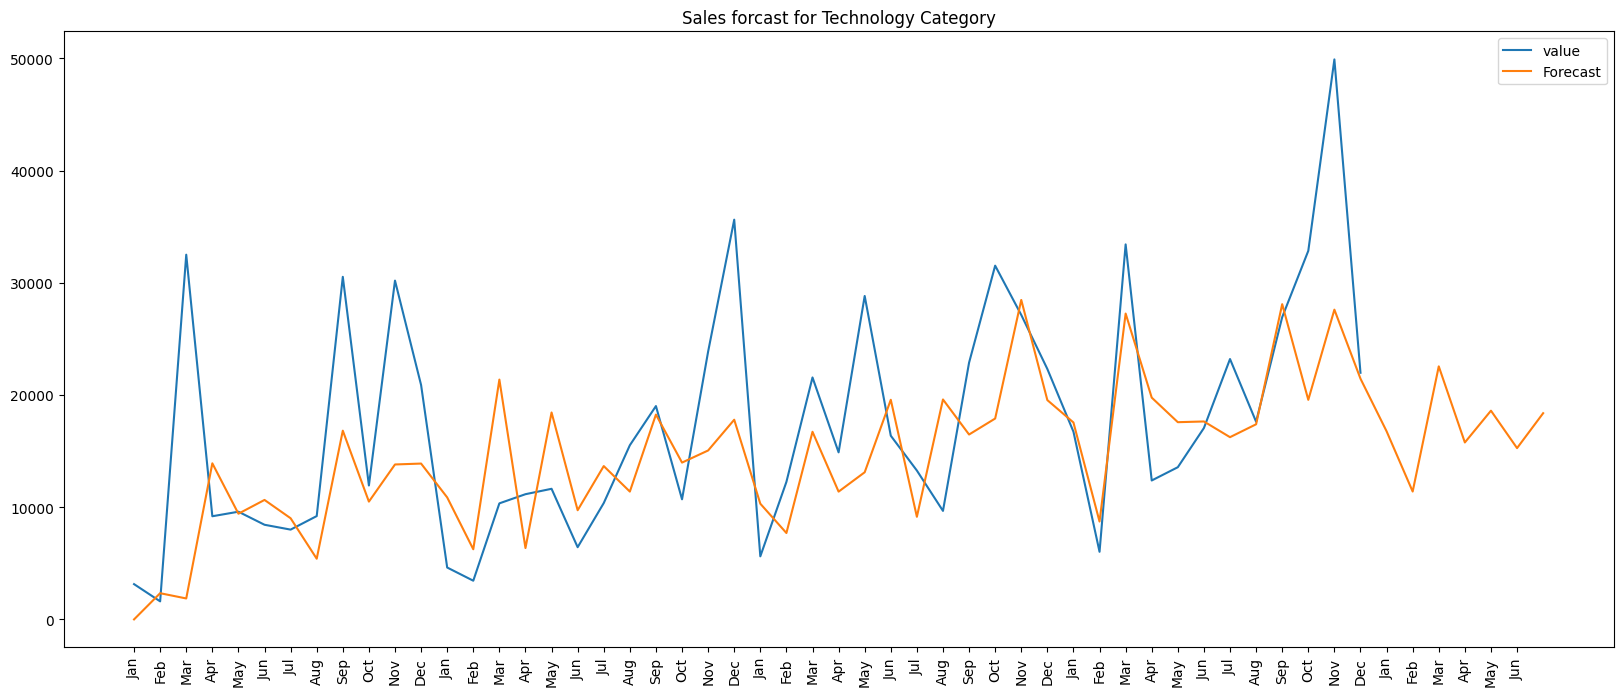

In [202]:
SarimaxModel_Tech = SARIMAX(SalesQuantity_Tech[0:43],
                            order = (2, 0, 6), # p , d, q
                            seasonal_order = (12, 0, 6, 12)) # P, D, Q, s -> monthly: periodically: 12
# (3, 0, 7), (12, 0, 1, 12)
SalesModel_Tech = SarimaxModel_Tech.fit()

forecast2 = SalesModel_Tech.predict(start = 0, 
                                    end = (len(SalesQuantity_Tech)+6),
                                    typ = 'levels').rename('Forecast')

Months=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

SalesQuantity_Tech.plot(figsize = (20, 8), legend = True, title = 'Sales forcast for Technology Category')

forecast2.plot(legend = True, figsize = (20, 8))

# print("Next Six Month Forecast: \n", forecast2[-6:])

# Mean absolute percent error 
MAPE  =np.mean(abs(SalesQuantity_Tech[43:] - forecast2[43:])/SalesQuantity_Tech[43:])*100
print("MAPE = " + str(MAPE))
# MAPEs.append(MAPE)

# Printing month names in X-Axis
Months = Months + Months[:6]
plotLabels=plt.xticks(np.arange(0,54,1),Months, rotation=90)
# plt.savefig("figure_1_Tech")

In [55]:
forecast = forecast2[-6:]
forecast = forecast.astype('int') #saving the sales values as type integer
forecast_df = forecast.to_frame() # forecast is in Series form, converting it to DataFrame
forecast_df.reset_index(level=0, inplace=True) # converting the index to column
forecast_df.columns = ['Prediction Date', 'Predicted Sales'] # giving appropriate names to the output columns

# saving the output as a csv file with name 'prediction.csv'
prediction = pd.DataFrame(forecast_df).to_csv(url + '\prediction_Sales_Technology.csv',index=False) 


##### Dự báo doanh số của đồ dùng văn phòng

In [20]:
Office_Sup_Sales_Data = data[data['Category'] == 'Office Supplies']

In [57]:
pd.crosstab(columns=Office_Sup_Sales_Data['Month'],
            index = Office_Sup_Sales_Data["Year"],
            values = Office_Sup_Sales_Data["Sales"],
            aggfunc= 'sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2014,4851.080,1071.724,8605.879,11155.074,7135.624,12953.037,15121.208,11379.462,27423.298,7211.128,26862.436,18006.462
2015,1808.780,5368.067,15882.547,12558.558,9113.736,10647.747,4719.939,11735.108,19305.767,8673.410,21218.130,16201.674
2016,5299.682,6794.350,17346.931,10647.447,13035.202,10901.810,12924.444,8959.740,23263.738,16281.794,20487.278,37997.566
2017,21274.289,7407.772,14550.286,15072.191,13736.964,16912.039,10241.468,30059.852,31895.843,23037.192,31472.337,30436.942


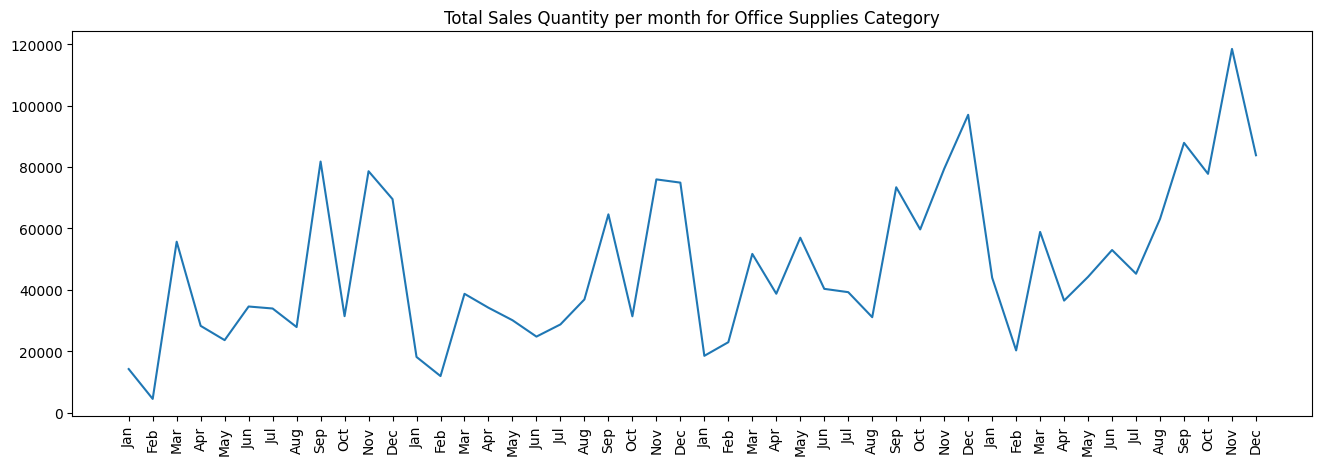

In [21]:
import matplotlib.pyplot as plt
SalesQuantity_Office_Supplies=pd.crosstab(columns=Office_Sup_Sales_Data['Year'],
                        index=Office_Sup_Sales_Data['Month'],
                        values=Office_Sup_Sales_Data['Sales'],
                        aggfunc='sum').melt()['value']

Months=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

# Plotting the sales
SalesQuantity.plot(kind='line', figsize=(16,5), title='Total Sales Quantity per month for Office Supplies Category')
# Setting the x-axis labels
plotLabels=plt.xticks(np.arange(0,48,1),Months, rotation=90)
plt.savefig("Plot_Off")

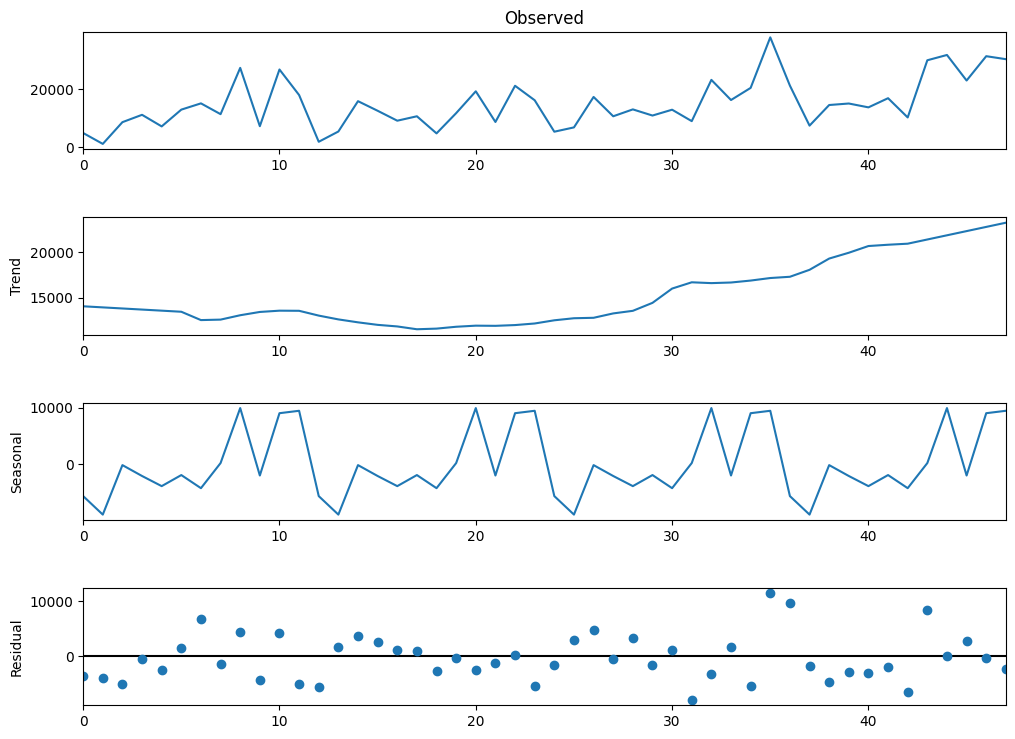

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = SalesQuantity_Office_Supplies.values
result_add = seasonal_decompose(series, model='additive', period=12 , extrapolate_trend='freq')
# result_mul = seasonal_decompose(series, model='multiplicative', period=12 , extrapolate_trend='freq')
result_add.plot()
CurrentFig=plt.gcf()
CurrentFig.set_size_inches(11,8)
plt.savefig("Plot_Off_2.png")

In [59]:
check_stationarity(SalesQuantity_Office_Supplies[0:42])

(-5.288989500810015, 5.770657524646485e-06, 0, 41, {'1%': -3.60098336718852, '5%': -2.9351348158036012, '10%': -2.6059629803688282}, 638.1957321875063)
ADF Statistic: -5.288990
p-value: 0.000006
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606
Stationary


In [60]:
check_stationarity(SalesQuantity_Office_Supplies[0:43])

(-5.39358331579135, 3.4939174884695714e-06, 0, 42, {'1%': -3.596635636000432, '5%': -2.933297331821618, '10%': -2.6049909750566895}, 658.0327028487825)
ADF Statistic: -5.393583
p-value: 0.000003
Critical Values:
	1%: -3.597
	5%: -2.933
	10%: -2.605
Stationary


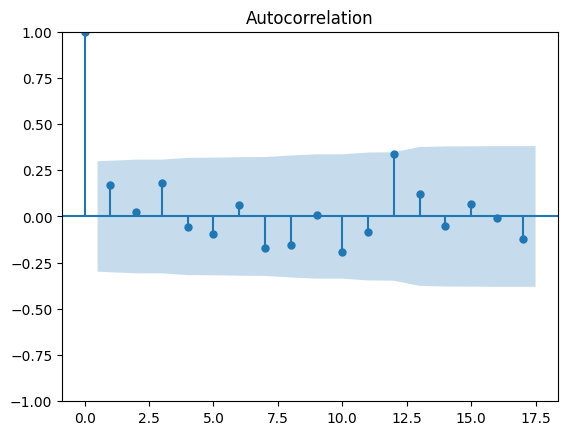

In [61]:
plot_acf(SalesQuantity_Office_Supplies[0:43])
plt.show()

[]

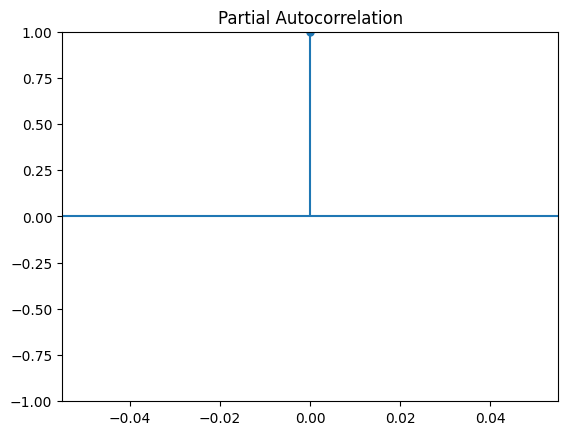

In [116]:
plot_pacf(abs(SalesQuantity_Office_Supplies[0:43].diff()))
plt.plot()

[]

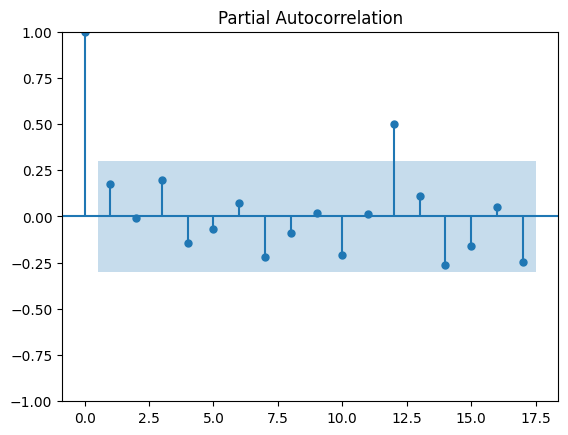

In [62]:
plot_pacf(SalesQuantity_Office_Supplies[0:43])
plt.plot()

In [63]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(SalesQuantity_Office_Supplies[0:43].diff().dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -4.222969926097038
p-value: 0.0006023288728574844


In [64]:
# ADF Statistic: -4.308890373772974
# p-value: 0.00042872624590980043

MAPE = 29.102022470136962


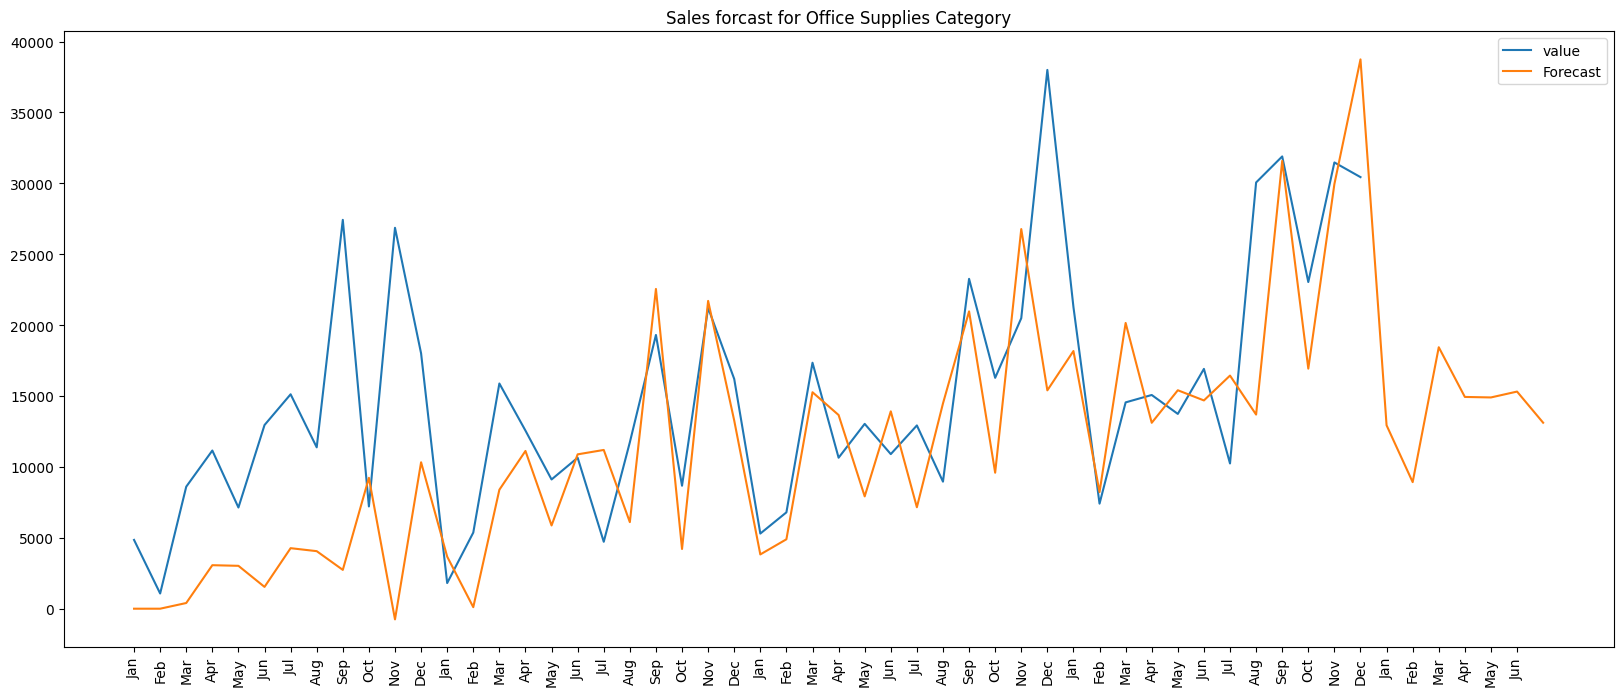

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')
SarimaxModel_Office_Supplies = SARIMAX(SalesQuantity_Office_Supplies[0:42],
                            order = (0, 0, 1),
                            seasonal_order = (14, 0, 3, 12),
                            initialization='approximate_diffuse')
# (2, 0, 0), (12, 0, 0, 12)
SalesModel_Office_Supplies = SarimaxModel_Office_Supplies.fit()

forecast3 = SalesModel_Office_Supplies.predict(start = 0, 
                                    end = (len(SalesQuantity_Office_Supplies)+6),
                                    typ = 'levels').rename('Forecast')

Months=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

SalesQuantity_Office_Supplies.plot(figsize = (20, 8), legend = True, title = 'Sales forcast for Office Supplies Category')

forecast3.plot(legend = True, figsize = (20, 8))

# print("Next Six Month Forecast: \n", forecast3[-6:])

# Mean absolute percent error 
MAPE  =np.mean(abs(SalesQuantity_Office_Supplies[42:] - forecast3[42:])/SalesQuantity_Office_Supplies[42:])*100
print("MAPE = " + str(MAPE))
# MAPe.append(MAPE)
# print('#### Accuracy of model:', round(100-MAPE,2), '####')
# print("MAPE = " + str(MAPE))
# Printing month names in X-Axis
Months = Months + Months[:6]
plotLabels=plt.xticks(np.arange(0,54,1),Months, rotation=90)

plt.savefig("figure_1_Office_Supplies")

In [24]:
forecast = forecast3[-6:]
forecast = forecast.astype('int') #saving the sales values as type integer
forecast_df = forecast.to_frame() # forecast is in Series form, converting it to DataFrame
forecast_df.reset_index(level=0, inplace=True) # converting the index to column
forecast_df.columns = ['Prediction Date', 'Predicted Sales'] # giving appropriate names to the output columns

# saving the output as a csv file with name 'prediction.csv'
prediction = pd.DataFrame(forecast_df).to_csv(url + '\prediction_Sales_Office_Supplies.csv',index=False) 


##### Dự báo doanh số với mặt hàng đồ nội thất

In [26]:
FurnitureSales_Data = data[data['Category'] == 'Furniture']

In [68]:
pd.crosstab(columns=FurnitureSales_Data['Month'],
            index = FurnitureSales_Data["Year"],
            values = FurnitureSales_Data["Sales"],
            aggfunc= 'sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2014,6242.5250,1839.6580,14573.9560,7944.8370,6912.7870,13206.1256,10821.051,7320.3465,23816.4808,12304.2470,21564.8727,30645.9665
2015,11739.9416,3134.3740,12499.7830,10475.6985,9374.9505,7714.1790,13674.420,9638.5922,26273.0230,12026.6235,30880.8325,23085.8192
2016,7622.7430,3925.5510,12801.0920,13212.0900,15119.8350,13070.5720,13068.519,12483.2323,27262.8809,11872.5770,31783.6288,36678.7150
2017,5964.0320,6866.3374,10893.4448,9065.9581,16957.5582,19008.5867,11813.022,15441.8740,29028.2060,21884.0682,37056.7150,31407.4668


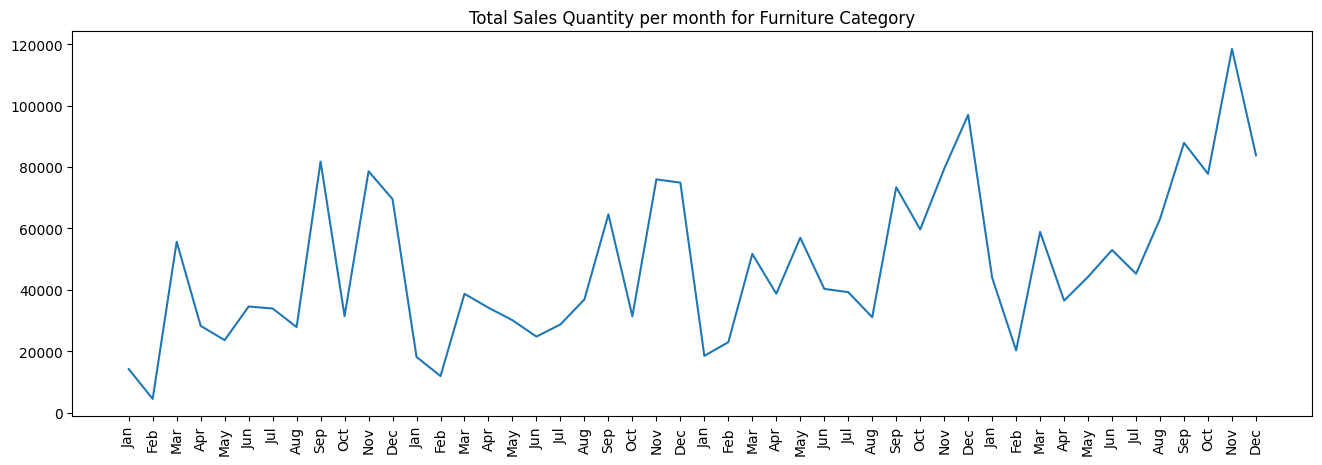

In [27]:
import matplotlib.pyplot as plt

SalesQuantity_Fur=pd.crosstab(columns=FurnitureSales_Data['Year'],
                        index=FurnitureSales_Data['Month'],
                        values=FurnitureSales_Data['Sales'],
                        aggfunc='sum').melt()['value']

Months=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

# Plotting the sales
SalesQuantity.plot(kind='line', figsize=(16,5), title='Total Sales Quantity per month for Furniture Category')
# Setting the x-axis labels
plotLabels=plt.xticks(np.arange(0,48,1),Months, rotation=90)
plt.savefig("Plot_Fur")

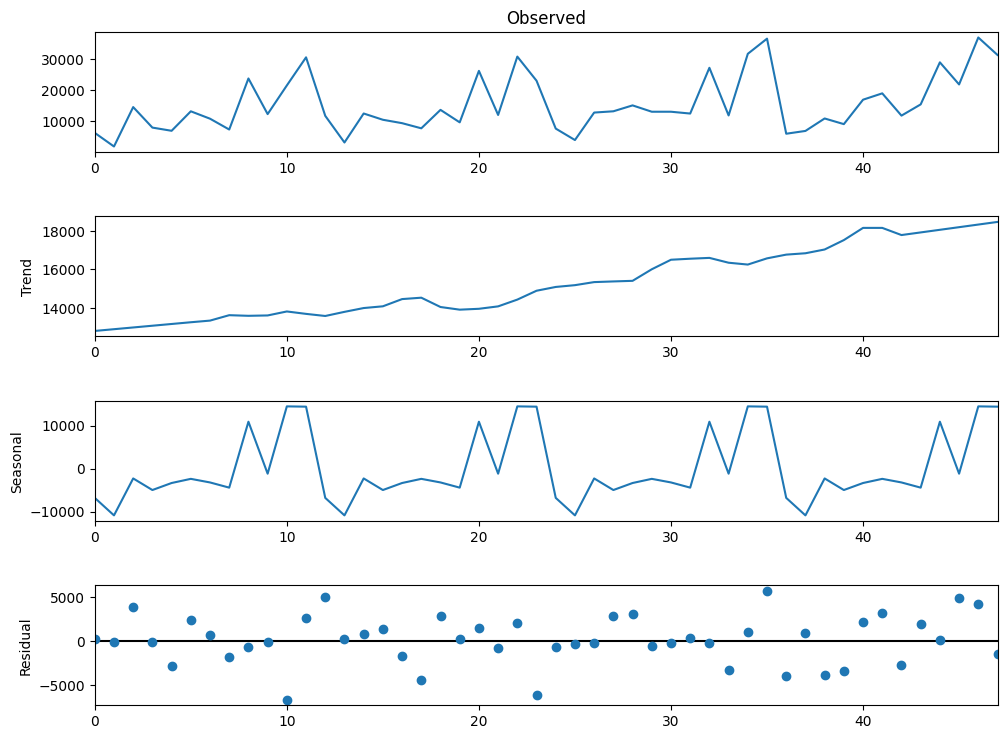

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = SalesQuantity_Fur.values
result_add = seasonal_decompose(series, model='additive', period=12 , extrapolate_trend='freq')
# result_mul = seasonal_decompose(series, model='multiplicative', period=12 , extrapolate_trend='freq')
result_add.plot()
CurrentFig=plt.gcf()
CurrentFig.set_size_inches(11,8)
plt.savefig("Plot_Fur_2.png")

In [70]:
check_stationarity(SalesQuantity_Fur)

(-4.699026242828901, 8.450793985809693e-05, 0, 47, {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}, 781.9861669712573)
ADF Statistic: -4.699026
p-value: 0.000085
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601
Stationary


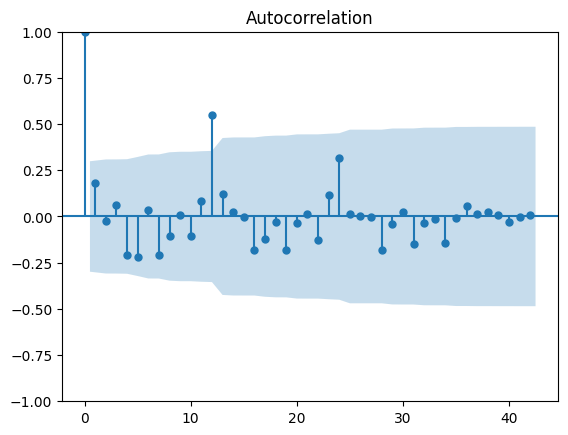

In [71]:
plot_acf(SalesQuantity_Fur[0:43], lags = 42)
plt.show()

[]

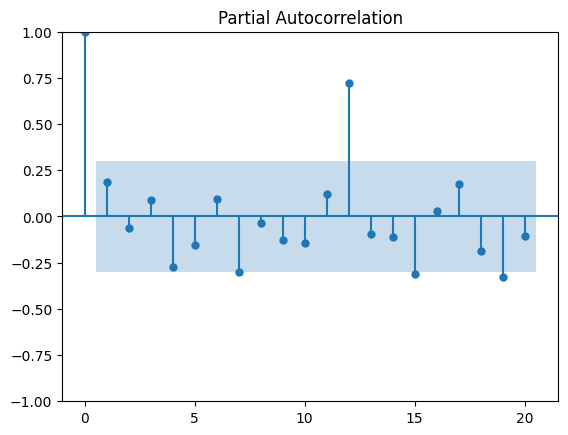

In [72]:
plot_pacf(SalesQuantity_Fur[0:43], lags = 20)
plt.plot()

Next Six Month Forecast: 
 49    17125.044868
50    41232.166924
51    30162.135323
52    35450.934266
53    46302.548198
54    36026.730884
Name: Forecast, dtype: float64
MAPE = 14.924612399471137


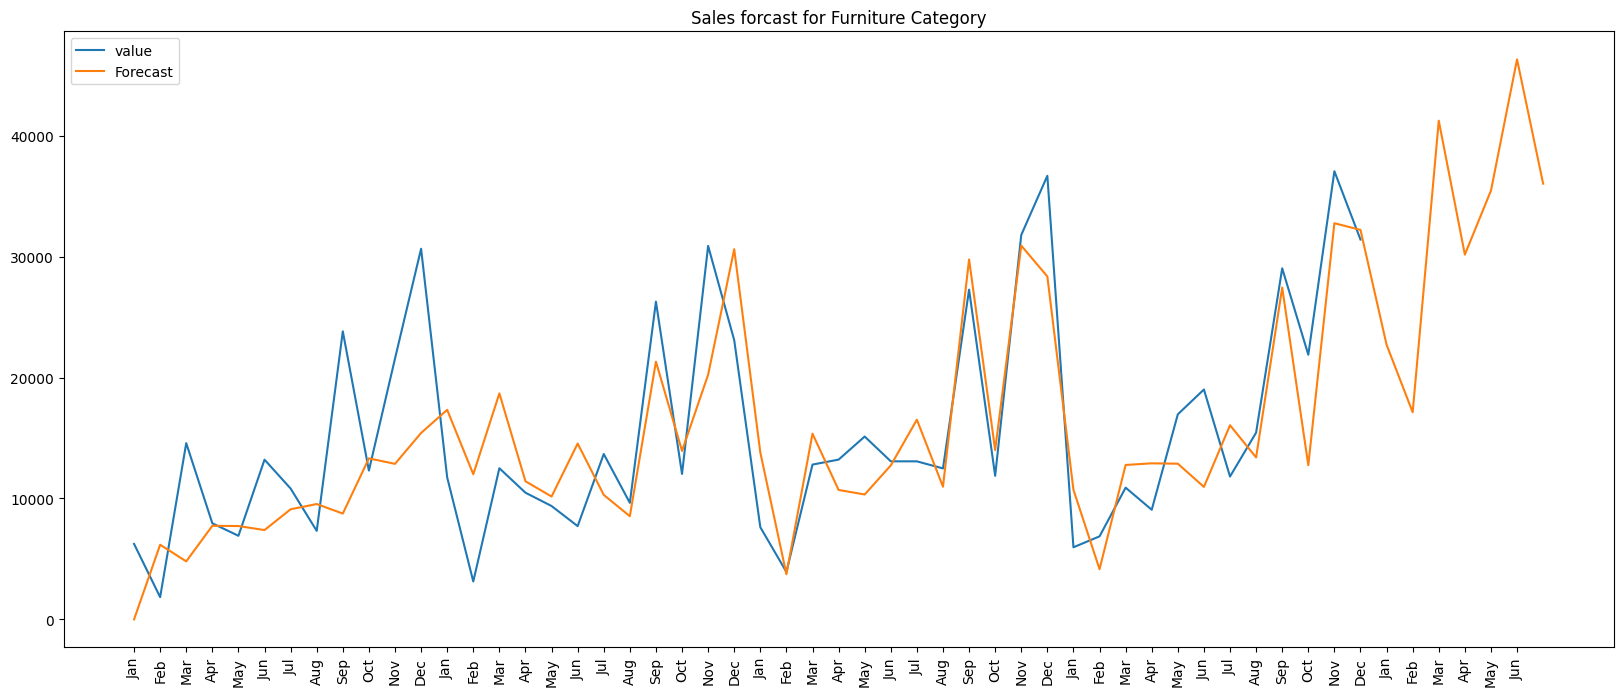

In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')

SarimaxModel_Fur = SARIMAX(SalesQuantity_Fur[0:43],
                            order = (1, 0, 1),
                            seasonal_order = (7, 0, 12, 12),
                            initialization='approximate_diffuse')

SalesModel_Fur = SarimaxModel_Fur.fit()

forecast4 = SalesModel_Fur.predict(start = 0, 
                                    end = (len(SalesQuantity_Fur)+6),
                                    typ = 'levels').rename('Forecast')

Months=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

SalesQuantity_Fur.plot(figsize = (20, 8), legend = True, title = 'Sales forcast for Furniture Category')

forecast4.plot(legend = True, figsize = (20, 8))

print("Next Six Month Forecast: \n", forecast4[-6:])

# Mean absolute percent error 
MAPE  =np.mean(abs(SalesQuantity_Fur[43:] - forecast4[43:])/SalesQuantity_Fur[43:])*100

# print('#### Accuracy of model:', round(100-MAPE,2), '####')
print("MAPE = " + str(MAPE))
# Printing month names in X-Axis
Months = Months + Months[:6]
plotLabels=plt.xticks(np.arange(0,54,1),Months, rotation=90)
plt.savefig("figure_1_Fur")

In [74]:
forecast = forecast4[-6:]
forecast = forecast.astype('int') #saving the sales values as type integer
forecast_df = forecast.to_frame() # forecast is in Series form, converting it to DataFrame
forecast_df.reset_index(level=0, inplace=True) # converting the index to column
forecast_df.columns = ['Prediction Date', 'Predicted Sales'] # giving appropriate names to the output columns

# saving the output as a csv file with name 'prediction.csv'
prediction = pd.DataFrame(forecast_df).to_csv(url + '\prediction_Sales_Furniture.csv',index=False) 


#### Mô hình Baseline

In [198]:
from statsmodels.tsa.ar_model import AutoReg

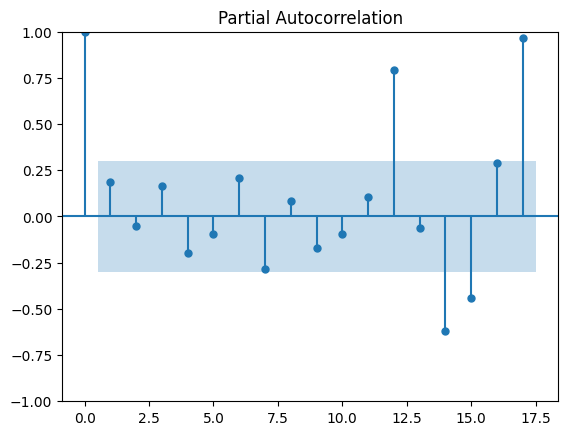

In [82]:
plot_pacf(SalesQuantity[0:43])
plt.show()

In [187]:
base = AutoReg(SalesQuantity[0:42], lags = 1)
base_model = base.fit()

forecast = base_model.predict(start = 0,
                   end = len(SalesQuantity) + 6).rename("Forecast")
MAPE=np.mean(abs(SalesQuantity[42:]-forecast[42:])/SalesQuantity[42:])*100

print("MAPE = " + str(MAPE))

MAPE = 38.854056527493874


In [188]:
base = AutoReg(SalesQuantity_Tech[0:43], lags = 1)
base_model = base.fit()

forecast2 = base_model.predict(start = 0,
                   end = len(SalesQuantity_Tech) + 6).rename("Forecast")
MAPE=np.mean(abs(SalesQuantity_Tech[43:]-forecast2[43:])/SalesQuantity_Tech[43:])*100

print("MAPE = " + str(MAPE))

MAPE = 37.65051773334227


In [189]:
base = AutoReg(SalesQuantity_Office_Supplies[0:43], lags = 3)
base_model = base.fit()

forecast3 = base_model.predict(start = 0,
                   end = len(SalesQuantity_Office_Supplies) + 6).rename("Forecast")
MAPE=np.mean(abs(SalesQuantity_Office_Supplies[43:]-forecast3[43:])/SalesQuantity_Office_Supplies[43:])*100

print("MAPE = " + str(MAPE))

MAPE = 51.94959321706


In [190]:
base = AutoReg(SalesQuantity_Fur[0:43], lags = 3)
base_model = base.fit()

forecast4 = base_model.predict(start = 0,
                   end = len(SalesQuantity_Fur) + 6).rename("Forecast")
MAPE=np.mean(abs(SalesQuantity_Fur[43:]-forecast4[43:])/SalesQuantity_Fur[43:])*100

print("MAPE = " + str(MAPE))

MAPE = 40.997679517297435


In [194]:
from statsmodels.tsa.arima.model import ARIMA
base = ARIMA(SalesQuantity[0:42], order = (0,0, 1))
base_model = base.fit()

forecast = base_model.predict(start = 0,
                   end = len(SalesQuantity) + 6).rename("Forecast")
MAPE=np.mean(abs(SalesQuantity[42:]-forecast[42:])/SalesQuantity[42:])*100

print("MAPE = " + str(MAPE))

MAPE = 39.65200559494957


In [195]:
from statsmodels.tsa.arima.model import ARIMA
base = ARIMA(SalesQuantity_Tech[0:43], order = (0,0, 1))
base_model = base.fit()

forecast2 = base_model.predict(start = 0,
                   end = len(SalesQuantity_Tech) + 6).rename("Forecast")
MAPE=np.mean(abs(SalesQuantity_Tech[42:]-forecast2[42:])/SalesQuantity_Tech[42:])*100

print("MAPE = " + str(MAPE))

MAPE = 37.50268997713484


In [196]:
from statsmodels.tsa.arima.model import ARIMA
base = ARIMA(SalesQuantity_Office_Supplies[0:43], order = (0, 0, 1))
base_model = base.fit()

forecast3 = base_model.predict(start = 0,
                   end = len(SalesQuantity_Office_Supplies) + 6).rename("Forecast")
MAPE=np.mean(abs(SalesQuantity_Office_Supplies[43:]-forecast3[43:])/SalesQuantity_Office_Supplies[43:])*100

print("MAPE = " + str(MAPE))

MAPE = 54.52383905075495


In [197]:
from statsmodels.tsa.arima.model import ARIMA
base = ARIMA(SalesQuantity_Fur[0:43], order = (0, 0, 1))
base_model = base.fit()

forecast4 = base_model.predict(start = 0,
                   end = len(SalesQuantity_Fur) + 6).rename("Forecast")
MAPE=np.mean(abs(SalesQuantity_Fur[43:]-forecast4[43:])/SalesQuantity_Fur[43:])*100

print("MAPE = " + str(MAPE))

MAPE = 43.33747867908792


Next Six Month Forecast: 49    17125
50    41232
51    30162
52    35450
53    46302
54    36026
Name: Forecast, dtype: int32
MAPE = 47.54631837467515


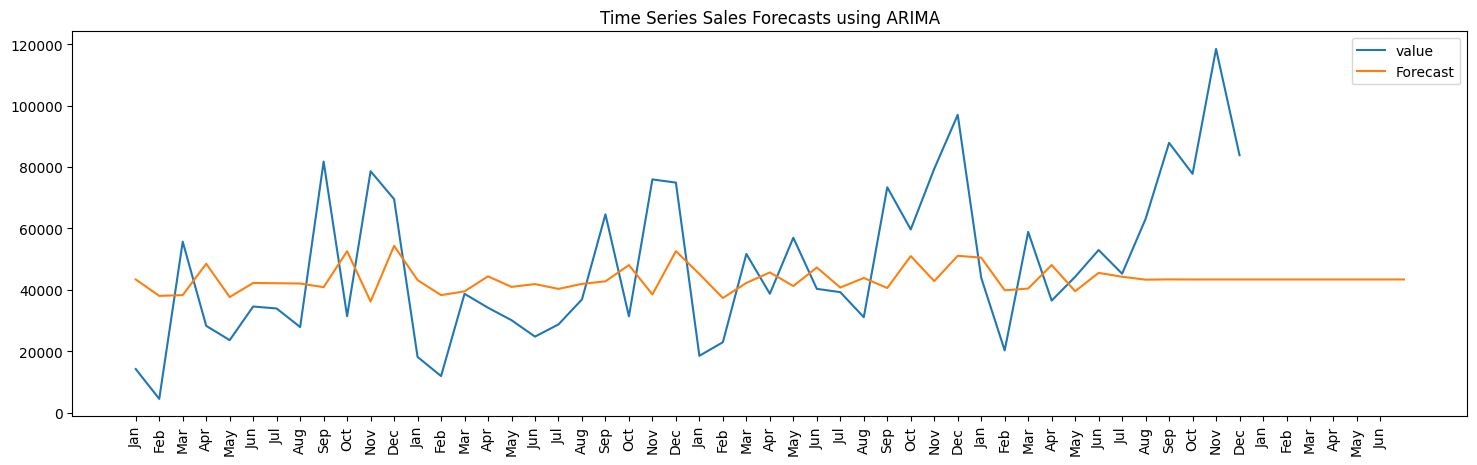

In [185]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(SalesQuantity[0:43], order = (1, 0, 1))
fitted = model.fit()
# fitted.predict(start = )
# Forecast for the next 6 months
Forecast = fitted.predict(start = 0,
                          end = (len(SalesQuantity)) + 6,
                          typ = 'levels').rename('Forecast')
print("Next Six Month Forecast:",forecast[-6:])
Months=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4
# Plot the forecast values
SalesQuantity.plot(figsize = (18, 5), legend = True, title='Time Series Sales Forecasts using ARIMA')
Forecast.plot(legend = True, figsize=(18,5))

# Measuring the accuracy of the model # MSE
MAPE=np.mean(abs(SalesQuantity[43:]-Forecast[43:])/SalesQuantity[43:])*100

print("MAPE = " + str(MAPE))
# print('#### Accuracy of model:', round(100-MAPE,2), '####')

# Printing month names in X-Axis
MonthNames=Months+Months[0:6]
plotLabels=plt.xticks(np.arange(0,54,1),MonthNames, rotation=90)

Next Six Month Forecast: 49    43354.638983
50    43354.638983
51    43354.638983
52    43354.638983
53    43354.638983
54    43354.638983
Name: Forecast, dtype: float64
MAPE = 38.78429245082834


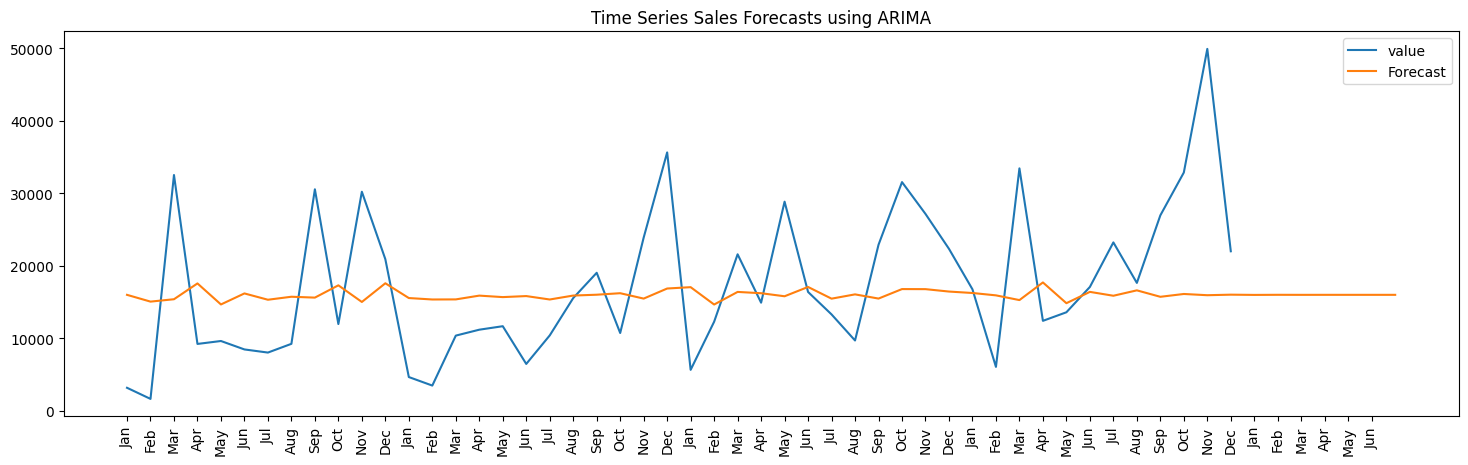

In [208]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(SalesQuantity_Tech[0:43], order = (1, 0, 1))
fitted = model.fit()
# fitted.predict(start = )
# Forecast for the next 6 months
Forecast = fitted.predict(start = 0,
                          end = (len(SalesQuantity_Tech)) + 6,
                          typ = 'levels').rename('Forecast')
print("Next Six Month Forecast:",forecast[-6:])
Months=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4
# Plot the forecast values
SalesQuantity_Tech.plot(figsize = (18, 5), legend = True, title='Time Series Sales Forecasts using ARIMA')
Forecast.plot(legend = True, figsize=(18,5))

# Measuring the accuracy of the model # MSE
MAPE=np.mean(abs(SalesQuantity_Tech[43:]-Forecast[43:])/SalesQuantity_Tech[43:])*100

print("MAPE = " + str(MAPE))
# print('#### Accuracy of model:', round(100-MAPE,2), '####')

# Printing month names in X-Axis
MonthNames=Months+Months[0:6]
plotLabels=plt.xticks(np.arange(0,54,1),MonthNames, rotation=90)

Next Six Month Forecast: 49    43354.638983
50    43354.638983
51    43354.638983
52    43354.638983
53    43354.638983
54    43354.638983
Name: Forecast, dtype: float64
MAPE = 54.54142163400544


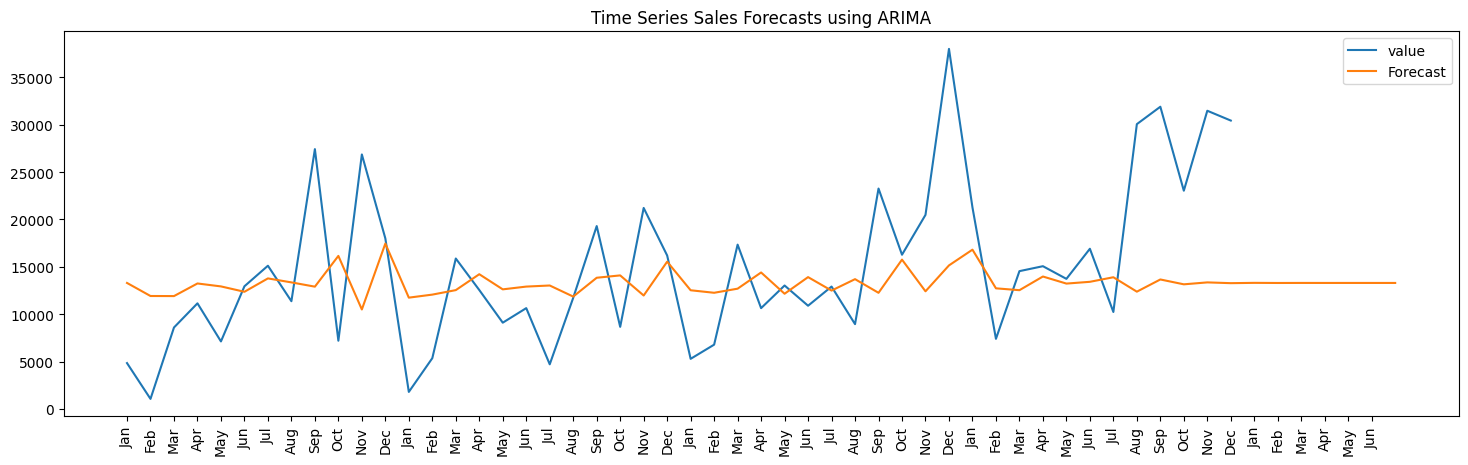

In [209]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(SalesQuantity_Office_Supplies[0:43], order = (1, 0, 1))
fitted = model.fit()
# fitted.predict(start = )
# Forecast for the next 6 months
Forecast = fitted.predict(start = 0,
                          end = (len(SalesQuantity_Office_Supplies)) + 6,
                          typ = 'levels').rename('Forecast')
print("Next Six Month Forecast:",forecast[-6:])
Months=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4
# Plot the forecast values
SalesQuantity_Office_Supplies.plot(figsize = (18, 5), legend = True, title='Time Series Sales Forecasts using ARIMA')
Forecast.plot(legend = True, figsize=(18,5))

# Measuring the accuracy of the model # MSE
MAPE=np.mean(abs(SalesQuantity_Office_Supplies[43:]-Forecast[43:])/SalesQuantity_Office_Supplies[43:])*100

print("MAPE = " + str(MAPE))
# print('#### Accuracy of model:', round(100-MAPE,2), '####')

# Printing month names in X-Axis
MonthNames=Months+Months[0:6]
plotLabels=plt.xticks(np.arange(0,54,1),MonthNames, rotation=90)

Next Six Month Forecast: 49    43354.638983
50    43354.638983
51    43354.638983
52    43354.638983
53    43354.638983
54    43354.638983
Name: Forecast, dtype: float64
MAPE = 43.31946437757347


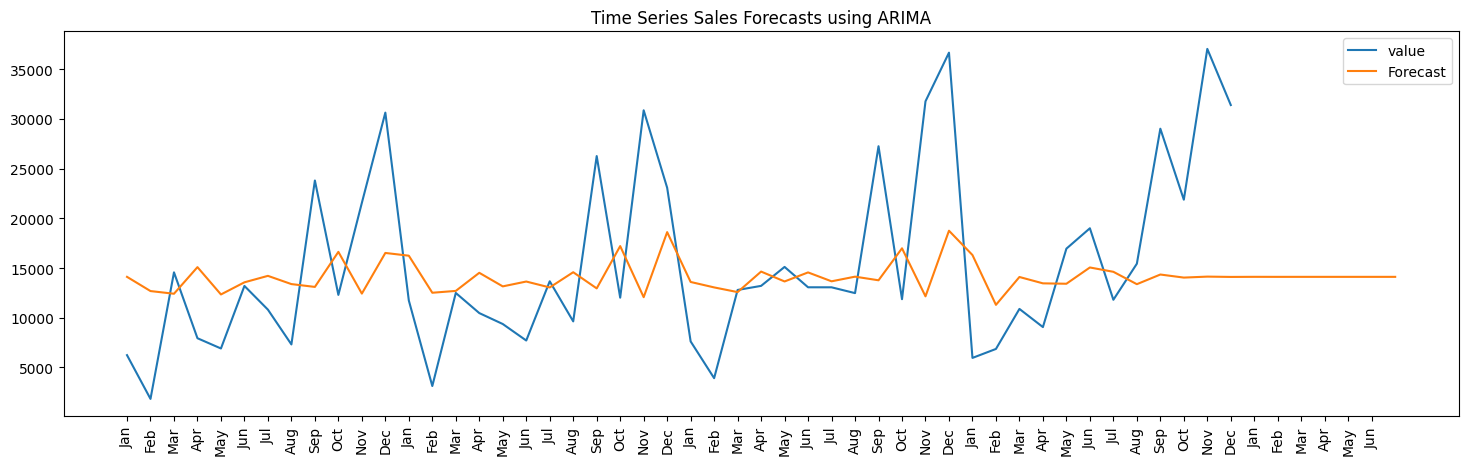

In [210]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(SalesQuantity_Fur[0:43], order = (1, 0, 1))
fitted = model.fit()
# fitted.predict(start = )
# Forecast for the next 6 months
Forecast = fitted.predict(start = 0,
                          end = (len(SalesQuantity_Fur)) + 6,
                          typ = 'levels').rename('Forecast')
print("Next Six Month Forecast:",forecast[-6:])
Months=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4
# Plot the forecast values
SalesQuantity_Fur.plot(figsize = (18, 5), legend = True, title='Time Series Sales Forecasts using ARIMA')
Forecast.plot(legend = True, figsize=(18,5))

# Measuring the accuracy of the model # MSE
MAPE=np.mean(abs(SalesQuantity_Fur[43:]-Forecast[43:])/SalesQuantity_Fur[43:])*100

print("MAPE = " + str(MAPE))
# print('#### Accuracy of model:', round(100-MAPE,2), '####')

# Printing month names in X-Axis
MonthNames=Months+Months[0:6]
plotLabels=plt.xticks(np.arange(0,54,1),MonthNames, rotation=90)

#### LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
#Build LSTM model
model=Sequential()
#Add first layer to model
model.add(LSTM(50, return_sequences=True, input_shape=(SalesQuantity[0:43].shape[0],1)))
#Add second layer to model
model.add(LSTM(50, return_sequences=False))
#Add Dense Layer to model with 25 neurons
model.add(Dense(25))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1))
#Compile the model
model.compile(optimizer='adam', loss = 'MeanAbsolutePercentageError')
model.fit(np.array(SalesQuantity[0:42]), np.array([SalesQuantity[42]]), batch_size= 1, epochs=3)